# NYU Stern Data Bootcamp Final - Spring 2023
#### Code created by Ahana Kaura, Amelie Srinivas, and Harrison Woods

### Document Setup

In [1]:
import os
import pandas as pd
import io
import numpy as np
import plotnine as pn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from plotnine import *
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
my_path = os.getcwd()
mast = "//uk_renewable_energy.csv"
file = my_path + mast
df_raw = pd.read_csv(file)

In [3]:
df_raw.columns = df_raw.columns.str.upper()
df = df_raw.dropna()

### ARIMA Model for Predicting Future Trends for Each Renawable Energy Source (UK)

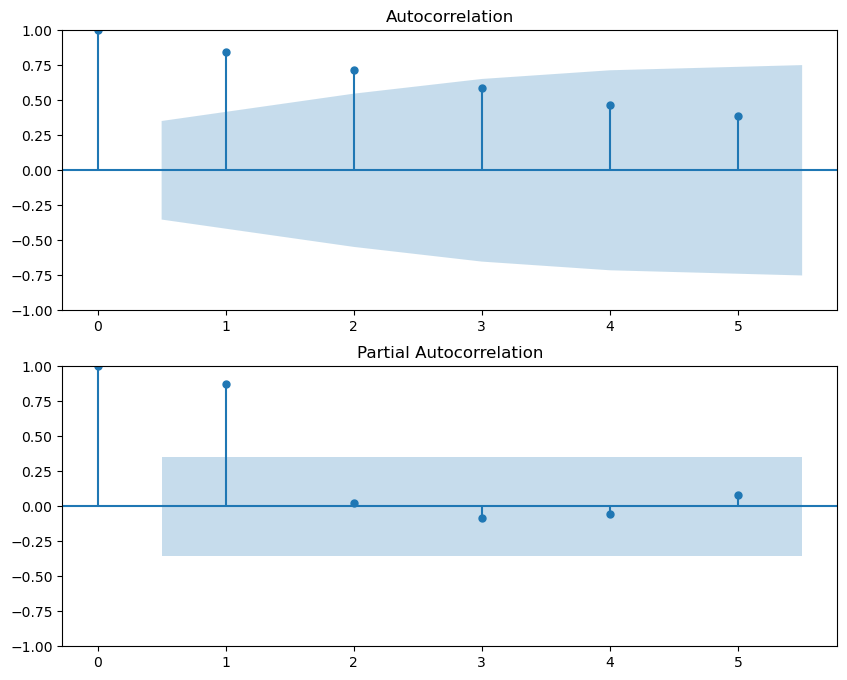

In [4]:
column_name = 'WIND, WAVE, TIDAL'
time_series = df[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

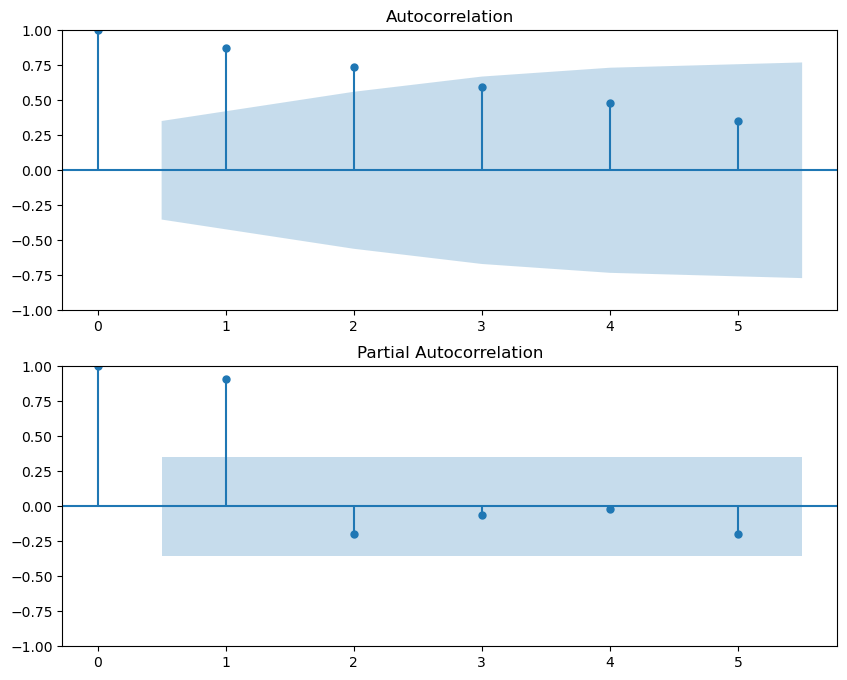

In [5]:
column_name = 'WOOD'
time_series = df[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

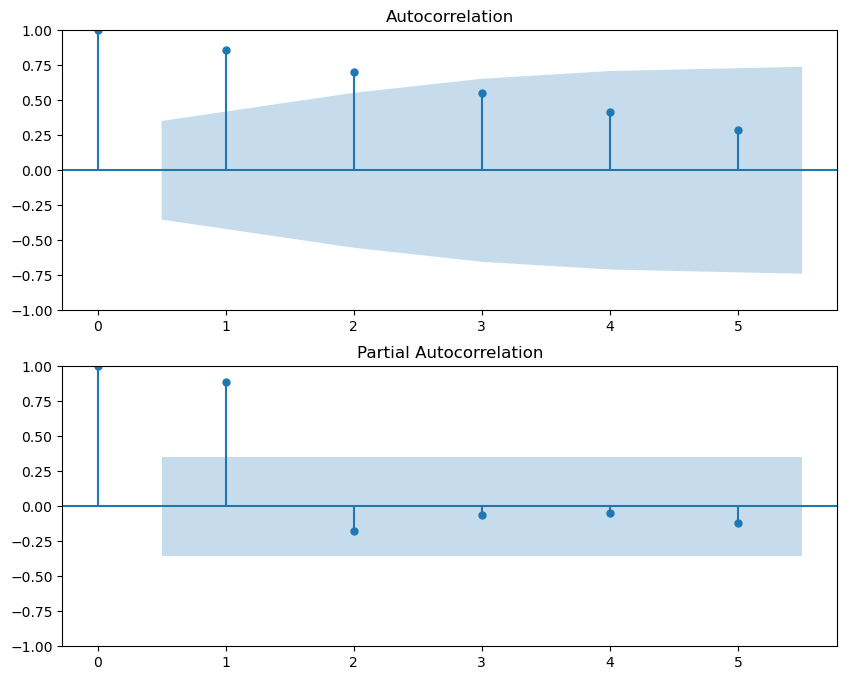

In [6]:
column_name = 'MUNICIPAL SOLID WASTE (MSW)'
time_series = df[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

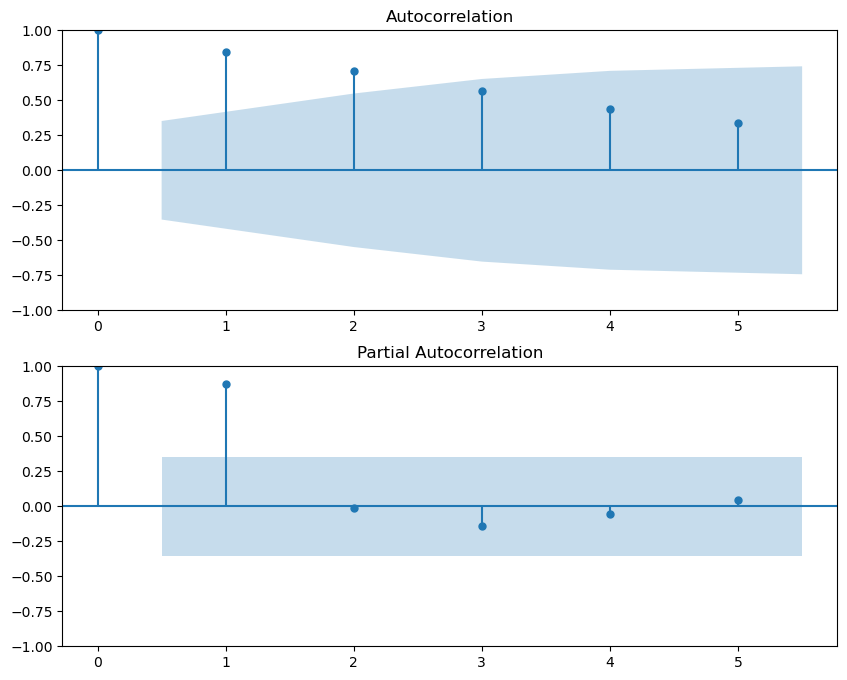

In [7]:
column_name = 'BIOMASS'
time_series = df[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

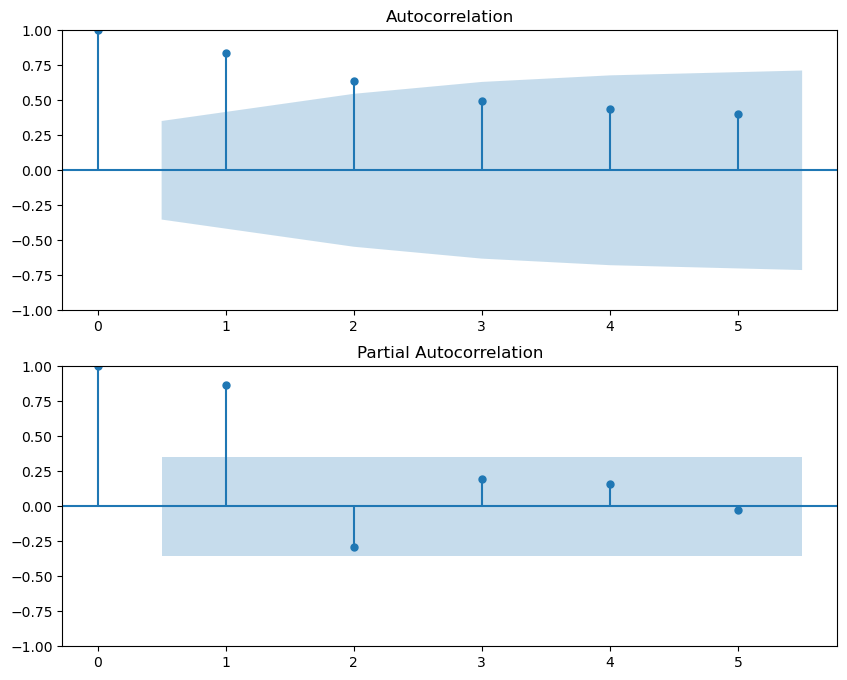

In [8]:
column_name = 'BIODIESEL'
time_series = df[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

In [9]:
columns_to_predict = [
    'HYDROELECTRIC POWER', 'WIND, WAVE, TIDAL', 'SOLAR PHOTOVOLTAIC',
    'GEOTHERMAL AQUIFERS', 'LANDFILL GAS', 'SEWAGE GAS', 'BIOGAS FROM AUTOGEN',
    'MUNICIPAL SOLID WASTE (MSW)', 'POULTRY LITTER', 'STRAW', 'WOOD', 'CHARCOAL',
    'LIQUID BIO-FUELS', 'BIOETHANOL', 'BIODIESEL', 'BIOMASS'
]

df_predictions = pd.DataFrame(columns=df.columns)

df_extended = pd.concat([df, pd.DataFrame(columns=df.columns)], axis=0)
df_extended.reset_index(drop=True, inplace=True)

for column in columns_to_predict:
    series = df_extended[column].copy()

    model = ARIMA(series, order=(1, 1, 1)) 
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(series), end=len(series) + 4)

    for i, value in enumerate(predictions):
        df_extended.loc[len(df) + i, column] = value

df_predictions = df_extended.sort_values('YEAR').reset_index(drop=True)

df_predictions.loc[31, 'YEAR'] = 2021
df_predictions.loc[32, 'YEAR'] = 2022
df_predictions.loc[33, 'YEAR'] = 2023
df_predictions.loc[34, 'YEAR'] = 2024
df_predictions.loc[35, 'YEAR'] = 2025

df_predictions['YEAR'] = pd.to_numeric(df_predictions['YEAR'])

### Train/Test Split Model for Predicting the Use of Traditional Energy Sources (UK)

In [10]:
y=df['TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']
X=df[['HYDROELECTRIC POWER', 'WIND, WAVE, TIDAL', 'SOLAR PHOTOVOLTAIC',	'GEOTHERMAL AQUIFERS', 'LANDFILL GAS', 
      'SEWAGE GAS', 'BIOGAS FROM AUTOGEN', 'MUNICIPAL SOLID WASTE (MSW)', 'POULTRY LITTER', 'STRAW', 'WOOD', 
      'CHARCOAL', 'LIQUID BIO-FUELS', 'BIOETHANOL', 'BIODIESEL', 'BIOMASS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 10.209429027530184


In [11]:
X_2021 = [[df_predictions.loc[31, 'HYDROELECTRIC POWER'],	
          df_predictions.loc[31, 'WIND, WAVE, TIDAL'],	
          df_predictions.loc[31, 'SOLAR PHOTOVOLTAIC'],	
          df_predictions.loc[31, 'GEOTHERMAL AQUIFERS'],	
          df_predictions.loc[31, 'LANDFILL GAS'],	
          df_predictions.loc[31, 'SEWAGE GAS'],	
          df_predictions.loc[31, 'BIOGAS FROM AUTOGEN'],	
          df_predictions.loc[31, 'MUNICIPAL SOLID WASTE (MSW)'],	
          df_predictions.loc[31, 'POULTRY LITTER'],	
          df_predictions.loc[31, 'STRAW'],	
          df_predictions.loc[31, 'WOOD'],	
          df_predictions.loc[31, 'CHARCOAL'],	
          df_predictions.loc[31, 'LIQUID BIO-FUELS'],	
          df_predictions.loc[31, 'BIOETHANOL'],	
          df_predictions.loc[31, 'BIODIESEL'],	
          df_predictions.loc[31, 'BIOMASS']]]

y_2021 = model.predict(X_2021)

df_predictions.loc[31, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'] = y_2021

# ----------------
 
X_2022 = [[df_predictions.loc[32, 'HYDROELECTRIC POWER'],	
          df_predictions.loc[32, 'WIND, WAVE, TIDAL'],	
          df_predictions.loc[32, 'SOLAR PHOTOVOLTAIC'],	
          df_predictions.loc[32, 'GEOTHERMAL AQUIFERS'],	
          df_predictions.loc[32, 'LANDFILL GAS'],	
          df_predictions.loc[32, 'SEWAGE GAS'],	
          df_predictions.loc[32, 'BIOGAS FROM AUTOGEN'],	
          df_predictions.loc[32, 'MUNICIPAL SOLID WASTE (MSW)'],	
          df_predictions.loc[32, 'POULTRY LITTER'],	
          df_predictions.loc[32, 'STRAW'],	
          df_predictions.loc[32, 'WOOD'],	
          df_predictions.loc[32, 'CHARCOAL'],	
          df_predictions.loc[32, 'LIQUID BIO-FUELS'],	
          df_predictions.loc[32, 'BIOETHANOL'],	
          df_predictions.loc[32, 'BIODIESEL'],	
          df_predictions.loc[32, 'BIOMASS']]]

y_2022 = model.predict(X_2022)

df_predictions.loc[32, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'] = y_2022

# ----------------

X_2023 = [[df_predictions.loc[33, 'HYDROELECTRIC POWER'],	
          df_predictions.loc[33, 'WIND, WAVE, TIDAL'],	
          df_predictions.loc[33, 'SOLAR PHOTOVOLTAIC'],	
          df_predictions.loc[33, 'GEOTHERMAL AQUIFERS'],	
          df_predictions.loc[33, 'LANDFILL GAS'],	
          df_predictions.loc[33, 'SEWAGE GAS'],	
          df_predictions.loc[33, 'BIOGAS FROM AUTOGEN'],	
          df_predictions.loc[33, 'MUNICIPAL SOLID WASTE (MSW)'],	
          df_predictions.loc[33, 'POULTRY LITTER'],	
          df_predictions.loc[33, 'STRAW'],	
          df_predictions.loc[33, 'WOOD'],	
          df_predictions.loc[33, 'CHARCOAL'],	
          df_predictions.loc[33, 'LIQUID BIO-FUELS'],	
          df_predictions.loc[33, 'BIOETHANOL'],	
          df_predictions.loc[33, 'BIODIESEL'],	
          df_predictions.loc[33, 'BIOMASS']]]

y_2023 = model.predict(X_2023)

df_predictions.loc[33, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'] = y_2023

# ----------------

X_2024 = [[df_predictions.loc[34, 'HYDROELECTRIC POWER'],	
          df_predictions.loc[34, 'WIND, WAVE, TIDAL'],	
          df_predictions.loc[34, 'SOLAR PHOTOVOLTAIC'],	
          df_predictions.loc[34, 'GEOTHERMAL AQUIFERS'],	
          df_predictions.loc[34, 'LANDFILL GAS'],	
          df_predictions.loc[34, 'SEWAGE GAS'],	
          df_predictions.loc[34, 'BIOGAS FROM AUTOGEN'],	
          df_predictions.loc[34, 'MUNICIPAL SOLID WASTE (MSW)'],	
          df_predictions.loc[34, 'POULTRY LITTER'],	
          df_predictions.loc[34, 'STRAW'],	
          df_predictions.loc[34, 'WOOD'],	
          df_predictions.loc[34, 'CHARCOAL'],	
          df_predictions.loc[34, 'LIQUID BIO-FUELS'],	
          df_predictions.loc[34, 'BIOETHANOL'],	
          df_predictions.loc[34, 'BIODIESEL'],	
          df_predictions.loc[34, 'BIOMASS']]]

y_2024 = model.predict(X_2024)

df_predictions.loc[34, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'] = y_2024

# ----------------

X_2025 = [[df_predictions.loc[35, 'HYDROELECTRIC POWER'],	
          df_predictions.loc[35, 'WIND, WAVE, TIDAL'],	
          df_predictions.loc[35, 'SOLAR PHOTOVOLTAIC'],	
          df_predictions.loc[35, 'GEOTHERMAL AQUIFERS'],	
          df_predictions.loc[35, 'LANDFILL GAS'],	
          df_predictions.loc[35, 'SEWAGE GAS'],	
          df_predictions.loc[35, 'BIOGAS FROM AUTOGEN'],	
          df_predictions.loc[35, 'MUNICIPAL SOLID WASTE (MSW)'],	
          df_predictions.loc[35, 'POULTRY LITTER'],	
          df_predictions.loc[35, 'STRAW'],	
          df_predictions.loc[35, 'WOOD'],	
          df_predictions.loc[35, 'CHARCOAL'],	
          df_predictions.loc[35, 'LIQUID BIO-FUELS'],	
          df_predictions.loc[35, 'BIOETHANOL'],	
          df_predictions.loc[35, 'BIODIESEL'],	
          df_predictions.loc[35, 'BIOMASS']]]

y_2025 = model.predict(X_2025)

df_predictions.loc[35, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'] = y_2025

In [12]:
df_predictions.loc[31, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] = df_predictions.loc[31, 'HYDROELECTRIC POWER'] + df_predictions.loc[31, 'WIND, WAVE, TIDAL'] + df_predictions.loc[31, 'SOLAR PHOTOVOLTAIC'] + df_predictions.loc[31, 'GEOTHERMAL AQUIFERS'] + df_predictions.loc[31, 'LANDFILL GAS'] + df_predictions.loc[31, 'SEWAGE GAS'] + df_predictions.loc[31, 'BIOGAS FROM AUTOGEN'] + df_predictions.loc[31, 'MUNICIPAL SOLID WASTE (MSW)'] + df_predictions.loc[31, 'POULTRY LITTER'] + 	df_predictions.loc[31, 'STRAW'] + df_predictions.loc[31, 'WOOD'] + df_predictions.loc[31, 'CHARCOAL'] + df_predictions.loc[31, 'LIQUID BIO-FUELS'] + df_predictions.loc[31, 'BIOETHANOL'] + df_predictions.loc[31, 'BIODIESEL'] + df_predictions.loc[31, 'BIOMASS']

df_predictions.loc[32, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] = df_predictions.loc[32, 'HYDROELECTRIC POWER'] + df_predictions.loc[32, 'WIND, WAVE, TIDAL'] + df_predictions.loc[32, 'SOLAR PHOTOVOLTAIC'] + df_predictions.loc[32, 'GEOTHERMAL AQUIFERS'] + df_predictions.loc[32, 'LANDFILL GAS'] + df_predictions.loc[32, 'SEWAGE GAS'] + df_predictions.loc[32, 'BIOGAS FROM AUTOGEN'] + df_predictions.loc[32, 'MUNICIPAL SOLID WASTE (MSW)'] + df_predictions.loc[32, 'POULTRY LITTER'] + 	df_predictions.loc[32, 'STRAW'] + df_predictions.loc[32, 'WOOD'] + df_predictions.loc[32, 'CHARCOAL'] + df_predictions.loc[32, 'LIQUID BIO-FUELS'] + df_predictions.loc[32, 'BIOETHANOL'] + df_predictions.loc[32, 'BIODIESEL'] + df_predictions.loc[32, 'BIOMASS']

df_predictions.loc[33, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] = df_predictions.loc[33, 'HYDROELECTRIC POWER'] + df_predictions.loc[33, 'WIND, WAVE, TIDAL'] + df_predictions.loc[33, 'SOLAR PHOTOVOLTAIC'] + df_predictions.loc[33, 'GEOTHERMAL AQUIFERS'] + df_predictions.loc[33, 'LANDFILL GAS'] + df_predictions.loc[33, 'SEWAGE GAS'] + df_predictions.loc[33, 'BIOGAS FROM AUTOGEN'] + df_predictions.loc[33, 'MUNICIPAL SOLID WASTE (MSW)'] + df_predictions.loc[33, 'POULTRY LITTER'] + 	df_predictions.loc[33, 'STRAW'] + df_predictions.loc[33, 'WOOD'] + df_predictions.loc[33, 'CHARCOAL'] + df_predictions.loc[33, 'LIQUID BIO-FUELS'] + df_predictions.loc[33, 'BIOETHANOL'] + df_predictions.loc[33, 'BIODIESEL'] + df_predictions.loc[33, 'BIOMASS']

df_predictions.loc[34, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] = df_predictions.loc[34, 'HYDROELECTRIC POWER'] + df_predictions.loc[34, 'WIND, WAVE, TIDAL'] + df_predictions.loc[34, 'SOLAR PHOTOVOLTAIC'] + df_predictions.loc[34, 'GEOTHERMAL AQUIFERS'] + df_predictions.loc[34, 'LANDFILL GAS'] + df_predictions.loc[34, 'SEWAGE GAS'] + df_predictions.loc[34, 'BIOGAS FROM AUTOGEN'] + df_predictions.loc[34, 'MUNICIPAL SOLID WASTE (MSW)'] + df_predictions.loc[34, 'POULTRY LITTER'] + 	df_predictions.loc[34, 'STRAW'] + df_predictions.loc[34, 'WOOD'] + df_predictions.loc[34, 'CHARCOAL'] + df_predictions.loc[34, 'LIQUID BIO-FUELS'] + df_predictions.loc[34, 'BIOETHANOL'] + df_predictions.loc[34, 'BIODIESEL'] + df_predictions.loc[34, 'BIOMASS']

df_predictions.loc[35, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] = df_predictions.loc[35, 'HYDROELECTRIC POWER'] + df_predictions.loc[35, 'WIND, WAVE, TIDAL'] + df_predictions.loc[35, 'SOLAR PHOTOVOLTAIC'] + df_predictions.loc[35, 'GEOTHERMAL AQUIFERS'] + df_predictions.loc[35, 'LANDFILL GAS'] + df_predictions.loc[35, 'SEWAGE GAS'] + df_predictions.loc[35, 'BIOGAS FROM AUTOGEN'] + df_predictions.loc[35, 'MUNICIPAL SOLID WASTE (MSW)'] + df_predictions.loc[35, 'POULTRY LITTER'] + 	df_predictions.loc[35, 'STRAW'] + df_predictions.loc[35, 'WOOD'] + df_predictions.loc[35, 'CHARCOAL'] + df_predictions.loc[35, 'LIQUID BIO-FUELS'] + df_predictions.loc[35, 'BIOETHANOL'] + df_predictions.loc[35, 'BIODIESEL'] + df_predictions.loc[35, 'BIOMASS']

df_predictions.loc[31, 'FRACTION FROM RENEWABLE SOURCES AND WASTE'] = df_predictions.loc[31, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] / df_predictions.loc[31, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']

df_predictions.loc[32, 'FRACTION FROM RENEWABLE SOURCES AND WASTE'] = df_predictions.loc[32, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] / df_predictions.loc[32, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']

df_predictions.loc[33, 'FRACTION FROM RENEWABLE SOURCES AND WASTE'] = df_predictions.loc[33, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] / df_predictions.loc[33, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']

df_predictions.loc[34, 'FRACTION FROM RENEWABLE SOURCES AND WASTE'] = df_predictions.loc[34, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] / df_predictions.loc[34, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']

df_predictions.loc[35, 'FRACTION FROM RENEWABLE SOURCES AND WASTE'] = df_predictions.loc[35, 'ENERGY FROM RENEWABLE & WASTE SOURCES'] / df_predictions.loc[35, 'TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS']

In [13]:
df_predictions.tail(5)

,YEAR,ENERGY FROM RENEWABLE & WASTE SOURCES,TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS,FRACTION FROM RENEWABLE SOURCES AND WASTE,HYDROELECTRIC POWER,"WIND, WAVE, TIDAL",SOLAR PHOTOVOLTAIC,GEOTHERMAL AQUIFERS,LANDFILL GAS,SEWAGE GAS,...,MUNICIPAL SOLID WASTE (MSW),POULTRY LITTER,STRAW,WOOD,CHARCOAL,LIQUID BIO-FUELS,BIOETHANOL,BIODIESEL,BIOMASS,CROSS-BOUNDARY ADJUSTMENT
31,2021,31.447210,162.727211,0.193251,0.503521,10.246865,1.279400,0.001,1.104999,0.507525,...,4.230478,0.224645,0.443729,6.636646,0.07679,-0.006405,0.257832,1.312831,3.626713,NaN
32,2022,32.483043,159.346417,0.203852,0.513415,10.836947,1.287826,0.001,1.103049,0.517362,...,4.333791,0.224665,0.458461,6.773761,0.07679,-0.006438,0.250958,1.312831,3.799414,NaN
33,2023,33.470075,156.462594,0.213917,0.512135,11.416790,1.294216,0.001,1.101719,0.526833,...,4.428095,0.224677,0.472473,6.898556,0.07679,-0.006425,0.245518,1.312831,3.966799,NaN
34,2024,34.423086,153.496925,0.224259,0.512300,11.986572,1.299062,0.001,1.100813,0.535952,...,4.514176,0.224683,0.485799,7.012137,0.07679,-0.006430,0.241213,1.312831,4.129030,NaN
35,2025,35.342530,150.563320,0.234735,0.512279,12.546467,1.302737,0.001,1.100196,0.544732,...,4.592751,0.224686,0.498475,7.115513,0.07679,-0.006428,0.237806,1.312831,4.286267,NaN


### Comparing Quarterly GHG Emissions to the Consumption of Renewable Energy (UK)

In [14]:
my_path1 = os.getcwd()
mast1 = "//ghg_emissions.xlsx"
file = my_path1 + mast1
df_raw1 = pd.read_excel(file)

In [15]:
df1 = df_raw1.dropna()
df1

,Time,Total GHG Non-seasonally adjusted,Total GHG Seasonally adjusted,Total CO2 Non-seasonally adjusted,Total CO2 Seasonally adjusted
0,1998 Q1,217933.0,201735.0,182314.6,159641.7
1,1998 Q2,191569.2,200913.4,142557.9,157027.4
2,1998 Q3,183554.7,199436.0,130477.8,152361.5
3,1998 Q4,214153.2,205125.7,176678.2,162997.9
4,1999 Q1,212426.6,195147.7,182815.1,159302.2
...,...,...,...,...,...
93,2021 Q2,119861.6,126567.7,99206.2,109194.9
94,2021 Q3,119859.9,127092.2,95906.9,107412.2
95,2021 Q4,136717.8,128396.6,115682.1,104802.4
96,2022 Q1,128908.5,123602.2,113126.0,102691.0


In [16]:
df1.columns

Index(['Time', 'Total GHG Non-seasonally adjusted',
       'Total GHG Seasonally adjusted', 'Total CO2 Non-seasonally adjusted',
       'Total CO2 Seasonally adjusted'],
      dtype='object')

In [17]:
df_new_quarterly = df1.drop(df1.index[92:98])

In [18]:
def convert_annual_to_quarterly(dataset):
    annual_dataset = dataset.groupby(dataset.index // 4).mean()
    return annual_dataset

In [19]:
df_annual = convert_annual_to_quarterly(df_new_quarterly)

In [20]:
df_annual['Year'] = [1998 + i for i in range(len(df_annual))]

cols = df_annual.columns.tolist()
cols.insert(0, cols.pop(cols.index('Year')))
df_annual = df_annual.reindex(columns=cols)

In [21]:
df_years_modified = df.drop(df.index[0:8]).reset_index(drop=True)

Now, we compare the two dataframes:



In [22]:
corr1 = (df_annual['Total GHG Seasonally adjusted'].corr(df_years_modified['ENERGY FROM RENEWABLE & WASTE SOURCES']))

corr2 = (df_annual['Total CO2 Seasonally adjusted'].corr(df_years_modified['ENERGY FROM RENEWABLE & WASTE SOURCES']))

format_corr1 = format(corr1, ',.3f')
format_corr2 = format(corr2, ',.3f')

print(f'{corr1:.5f}\n{corr2:.5f}')

-0.96259
-0.96922


In [23]:
df_annual.columns = df_annual.columns.str.upper()

In [24]:
merged_df = pd.merge(df_annual, df_years_modified, on=['YEAR'])

In [25]:
merged_df

,YEAR,TOTAL GHG NON-SEASONALLY ADJUSTED,TOTAL GHG SEASONALLY ADJUSTED,TOTAL CO2 NON-SEASONALLY ADJUSTED,TOTAL CO2 SEASONALLY ADJUSTED,ENERGY FROM RENEWABLE & WASTE SOURCES,TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS,FRACTION FROM RENEWABLE SOURCES AND WASTE,HYDROELECTRIC POWER,"WIND, WAVE, TIDAL",...,MUNICIPAL SOLID WASTE (MSW),POULTRY LITTER,STRAW,WOOD,CHARCOAL,LIQUID BIO-FUELS,BIOETHANOL,BIODIESEL,BIOMASS,CROSS-BOUNDARY ADJUSTMENT
0,1998,201802.525,201802.525,158007.125,158007.125,3.013,246.790,0.012,0.440,0.075,...,0.649,0.112,0.007,1.077,0.040,0.000,0.000,0.000,0.029,0.000
1,1999,193827.875,193827.900,155840.500,155840.525,3.148,246.112,0.013,0.459,0.073,...,0.633,0.148,0.007,0.959,0.033,0.000,0.000,0.000,0.074,0.000
2,2000,194617.500,194617.475,158477.225,158477.250,3.164,248.037,0.013,0.437,0.081,...,0.678,0.159,0.015,0.766,0.036,0.000,0.000,0.000,0.090,0.000
3,2001,196505.775,196505.800,161843.600,161843.625,3.270,252.807,0.013,0.348,0.083,...,0.731,0.199,0.076,0.716,0.033,0.000,0.000,0.000,0.078,0.000
4,2002,190353.700,190353.725,156661.725,156661.725,3.575,244.980,0.015,0.412,0.108,...,0.795,0.195,0.061,0.716,0.035,0.000,0.000,0.002,0.183,0.000
5,2003,192299.525,192299.525,159814.600,159814.600,3.802,248.011,0.015,0.278,0.111,...,0.816,0.181,0.085,0.719,0.037,0.000,0.000,0.016,0.301,0.000
6,2004,192189.275,192189.250,160996.875,160996.850,4.407,249.249,0.018,0.418,0.166,...,0.790,0.164,0.080,0.778,0.040,0.011,0.000,0.017,0.434,0.000
7,2005,190961.825,190961.850,160934.800,160934.800,5.026,249.704,0.020,0.423,0.250,...,0.794,0.158,0.071,1.019,0.036,0.173,0.048,0.027,0.393,0.001
8,2006,187099.425,187099.425,158292.350,158292.375,5.380,243.557,0.022,0.395,0.363,...,0.856,0.147,0.075,0.992,0.035,0.202,0.054,0.139,0.458,0.003
9,2007,185003.575,185003.550,157065.500,157065.475,5.579,239.041,0.023,0.437,0.453,...,0.882,0.152,0.071,0.960,0.034,0.060,0.086,0.285,0.386,0.006


In [26]:
correlation_matrix = merged_df[['TOTAL GHG SEASONALLY ADJUSTED', 'TOTAL CO2 SEASONALLY ADJUSTED', 'ENERGY FROM RENEWABLE & WASTE SOURCES']].corr()

In [27]:
merged_df['GHG EMISSIONS'] = np.power(merged_df['TOTAL GHG SEASONALLY ADJUSTED'], 0.25)

In [28]:
emissions_plot = {'GHG EMISSIONS': '#FF4500', 'ENERGY FROM RENEWABLE & WASTE SOURCES': '#00FF00'}

melted_df = pd.melt(merged_df, id_vars='YEAR', value_vars=['GHG EMISSIONS', 'ENERGY FROM RENEWABLE & WASTE SOURCES'], var_name='Key', value_name='Value')

### Creating a Dataframe from the International Energy Agency (IEA) Data

In [29]:
dict_year = { "Year": ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]}
dict_global_energy_production = {"Global Renewable Energy Production (%)": ["0.198", "0.202", "0.211", "0.219", "0.226", 
                                                                            "0.231", "0.240", "0.248", "0.256", "0.256", 
                                                                            "0.282","0.287"]}
dict_hydroelectric = {"Hydroelectric Generation (TWh)": ["3443.3", "3520.1", "2683.7", "3816.0", "3890.3","3902.6",
                                                           "4054.2","4083.2", "4231.0","4236.0", "4342.9","4327.4"]}
dict_wind = {"Wind Generation (TWh)": ["342.6", "437.3", "525.2", "647.3", "719.1", "839.8", "959.2", "1126.9", "1255.9",
                                        "1421.0", "1596.8", "1870.3"]}
dict_solar = {"Solar Generation (TWh)": ["32.2", "63.8", "99.0", "139.6", "190.2", "250.6", "329.1", "443.4", "588.8", "679.0", 
                              "823.8", "1002.9"]}

df_year = pd.DataFrame(dict_year)
df_global_energy_production = pd.DataFrame(dict_global_energy_production)
df_wind = pd.DataFrame(dict_wind)
df_solar = pd.DataFrame(dict_solar)


OVERALL_DICT = {
    "Year": ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
    "Global Renewable Energy Production (%)": ["0.198", "0.202", "0.211", "0.219", "0.226", "0.231", "0.240", "0.248", 
                                               "0.256", "0.256", "0.282","0.287"],
    "Hydroelectric Generation (TWh)": ["3443.3", "3520.1", "2683.7", "3816.0", "3890.3","3902.6",
                                                           "4054.2","4083.2", "4231.0","4236.0", "4342.9","4327.4"],
    "Wind Generation (TWh)": ["342.6", "437.3", "525.2", "647.3", "719.1", "839.8", "959.2", "1126.9", "1255.9",
                                        "1421.0", "1596.8", "1870.3"],
    "Solar Generation (TWh)": ["32.2", "63.8", "99.0", "139.6", "190.2", "250.6", "329.1", "443.4", "588.8", "679.0", 
                              "823.8", "1002.9"]}

df_overall = pd.DataFrame(OVERALL_DICT)
df_overall = df_overall.astype(float)
df_overall["Year"] = df_overall["Year"].astype(int)

In [30]:
df_overall.describe()

,Year,Global Renewable Energy Production (%),Hydroelectric Generation (TWh),Wind Generation (TWh),Solar Generation (TWh)
count,12.000000,12.000000,12.000000,12.00000,12.000000
mean,2015.500000,0.238000,3877.558333,978.45000,386.866667
std,3.605551,0.029027,475.970391,483.52125,321.144924
min,2010.000000,0.198000,2683.700000,342.60000,32.200000
25%,2012.750000,0.217000,3742.025000,616.77500,129.450000
50%,2015.500000,0.235500,3978.400000,899.50000,289.850000
75%,2018.250000,0.256000,4232.250000,1297.17500,611.350000
max,2021.000000,0.287000,4342.900000,1870.30000,1002.900000


### ARIMA Model for Predicting Future Trends for Each Renawable Energy Source (World)

In [31]:
df_predictions_uk = df_predictions

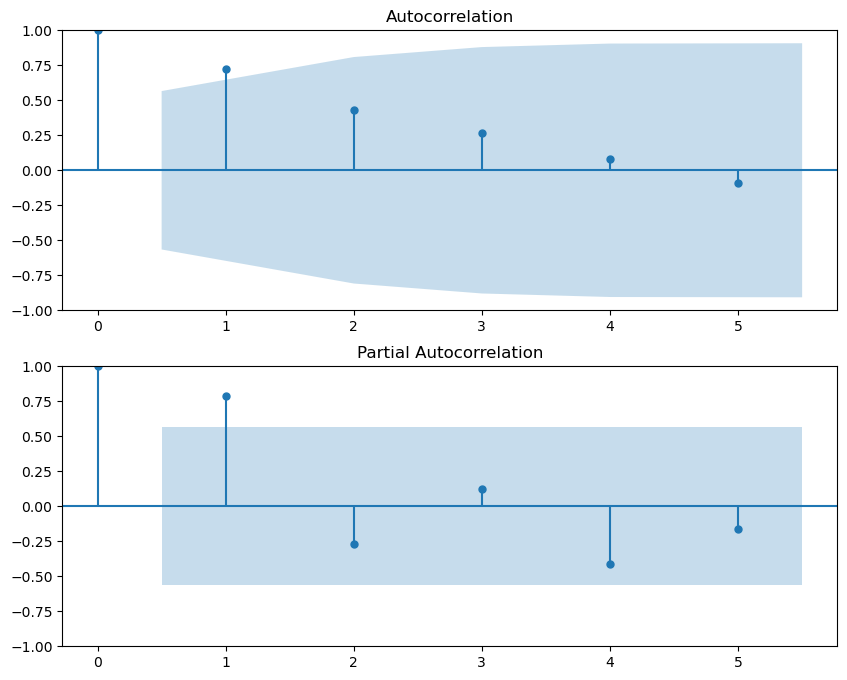

In [32]:
column_name = 'Global Renewable Energy Production (%)'
time_series = df_overall[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

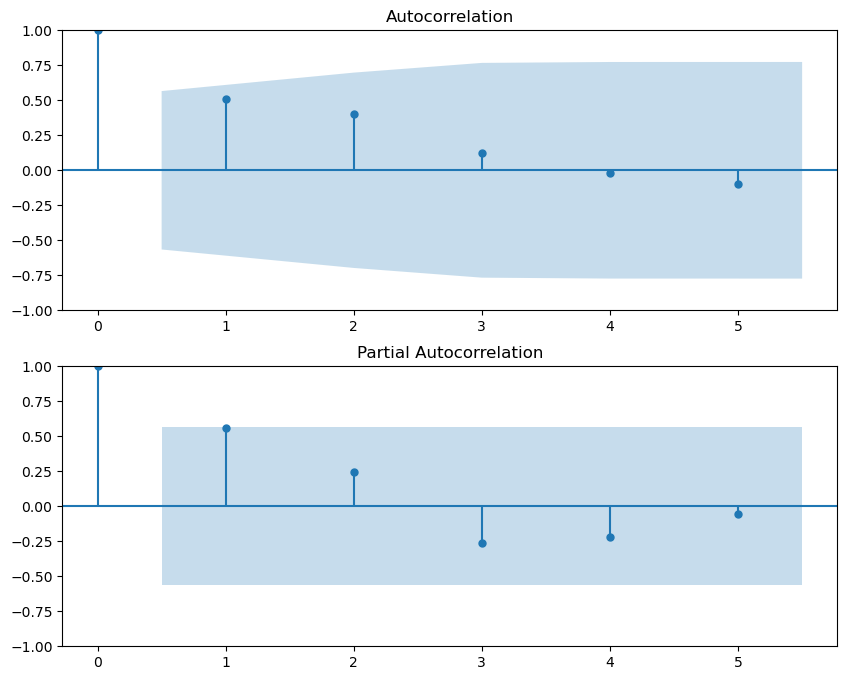

In [33]:
column_name = 'Hydroelectric Generation (TWh)'
time_series = df_overall[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

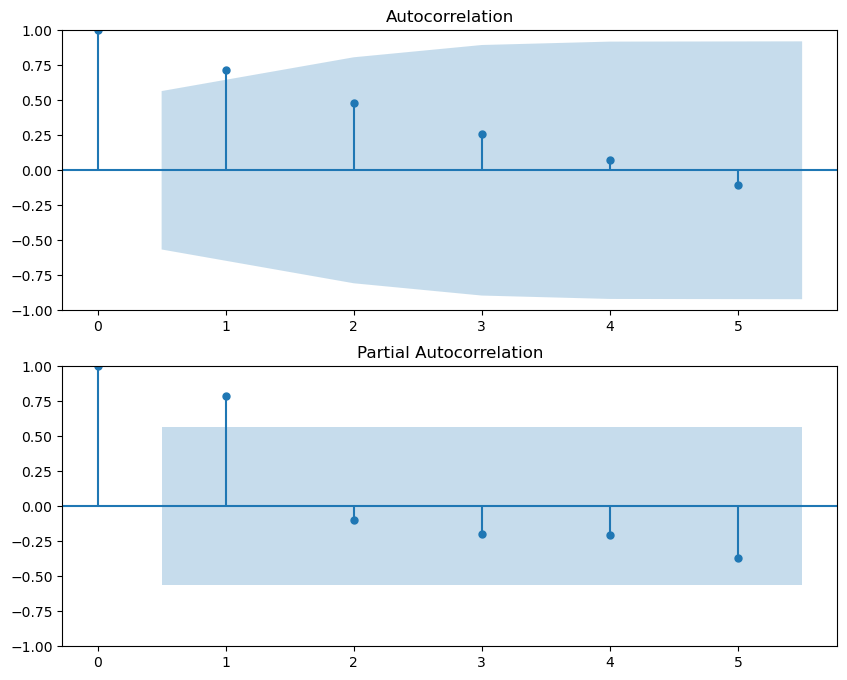

In [34]:
column_name = 'Wind Generation (TWh)'
time_series = df_overall[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

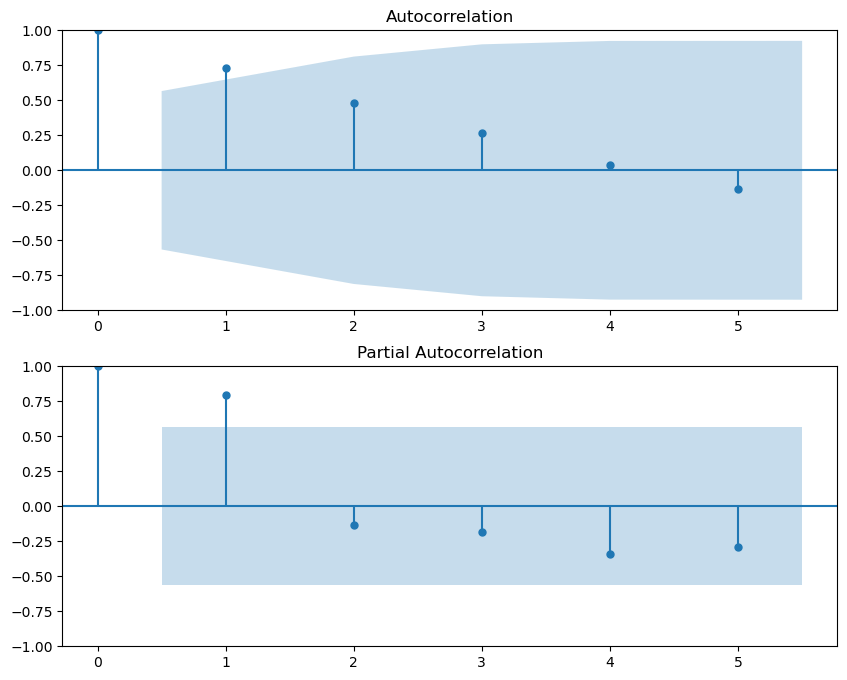

In [35]:
column_name = 'Solar Generation (TWh)'
time_series = df_overall[column_name]

n = time_series.shape[0]

max_lags = int(n * 0.5)

num_lags = 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax1, lags=min(max_lags, num_lags))
plot_pacf(time_series, ax=ax2, lags=min(max_lags, num_lags))
plt.show()

In [36]:
df2 = df_overall

In [37]:
columns_to_predict = [
    'Global Renewable Energy Production (%)', 'Hydroelectric Generation (TWh)', 'Wind Generation (TWh)', 
    'Solar Generation (TWh)']

df_predictions1 = pd.DataFrame(columns=df.columns)

df_extended = pd.concat([df2, pd.DataFrame(columns=df2.columns)], axis=0)
df_extended.reset_index(drop=True, inplace=True)

for column in columns_to_predict:
    series = df_extended[column].copy()

    model = ARIMA(series, order=(1, 1, 1)) 
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(series), end=len(series) + 4)

    for i, value in enumerate(predictions):
        df_extended.loc[len(df) + i, column] = value

df_predictions1 = df_extended.sort_values('Year').reset_index(drop=True)

df_predictions1.loc[12, 'Year'] = 2022
df_predictions1.loc[13, 'Year'] = 2023
df_predictions1.loc[14, 'Year'] = 2024
df_predictions1.loc[15, 'Year'] = 2025

df_predictions1['Year'] = pd.to_numeric(df_predictions1['Year'])

In [38]:
y=df2["Global Renewable Energy Production (%)"]
X=df2[['Hydroelectric Generation (TWh)', 'Wind Generation (TWh)', 
    'Solar Generation (TWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.007171050500352865


In [39]:
X_2022 = [[df_predictions1.loc[12, 'Hydroelectric Generation (TWh)'],
           df_predictions1.loc[12, 'Wind Generation (TWh)'],
           df_predictions1.loc[12, 'Solar Generation (TWh)']]]

y_2022 = model.predict(X_2022)

df_predictions1.loc[12, 'Global Renewable Energy Production (%)'] = y_2022


X_2023 = [[df_predictions1.loc[13, 'Hydroelectric Generation (TWh)'],
           df_predictions1.loc[13, 'Wind Generation (TWh)'],
           df_predictions1.loc[13, 'Solar Generation (TWh)']]]

y_2023 = model.predict(X_2023)

df_predictions1.loc[13, 'Global Renewable Energy Production (%)'] = y_2023


X_2024 = [[df_predictions1.loc[14, 'Hydroelectric Generation (TWh)'],
           df_predictions1.loc[14, 'Wind Generation (TWh)'],
           df_predictions1.loc[14, 'Solar Generation (TWh)']]]

y_2024 = model.predict(X_2024)

df_predictions1.loc[14, 'Global Renewable Energy Production (%)'] = y_2024

X_2025 = [[df_predictions1.loc[15, 'Hydroelectric Generation (TWh)'],
           df_predictions1.loc[15, 'Wind Generation (TWh)'],
           df_predictions1.loc[15, 'Solar Generation (TWh)']]]

y_2025 = model.predict(X_2025)

df_predictions1.loc[15, 'Global Renewable Energy Production (%)'] = y_2025

In [40]:
df_predictions1

,Year,Global Renewable Energy Production (%),Hydroelectric Generation (TWh),Wind Generation (TWh),Solar Generation (TWh)
0,2010.0,0.198000,3443.300000,342.600000,32.200000
1,2011.0,0.202000,3520.100000,437.300000,63.800000
2,2012.0,0.211000,2683.700000,525.200000,99.000000
3,2013.0,0.219000,3816.000000,647.300000,139.600000
4,2014.0,0.226000,3890.300000,719.100000,190.200000
5,2015.0,0.231000,3902.600000,839.800000,250.600000
6,2016.0,0.240000,4054.200000,959.200000,329.100000
7,2017.0,0.248000,4083.200000,1126.900000,443.400000
8,2018.0,0.256000,4231.000000,1255.900000,588.800000
9,2019.0,0.256000,4236.000000,1421.000000,679.000000


### Finding Correlation Between Renwable Energy Usage Between the UK and the World

In [41]:
df_predictions1 = df_predictions1.rename(columns={'Year': 'YEAR'})

In [42]:
pivot_table1 = pd.pivot_table(df_predictions_uk, index='YEAR', values=['HYDROELECTRIC POWER', 'WIND, WAVE, TIDAL', 
                                                                       "SOLAR PHOTOVOLTAIC"])
pivot_table2 = pd.pivot_table(df_predictions1, index='YEAR', values=['Hydroelectric Generation (TWh)', 
                                                                     'Wind Generation (TWh)', 
                                                                      "Solar Generation (TWh)"])

In [43]:
df_predictions_uk_subset = df_predictions_uk[['YEAR', 'HYDROELECTRIC POWER', 'WIND, WAVE, TIDAL', 'SOLAR PHOTOVOLTAIC']]
df_predictions_subset = df_predictions1[['YEAR', 'Hydroelectric Generation (TWh)', 'Wind Generation (TWh)', 'Solar Generation (TWh)']]
df_predictions_subset = df_predictions_subset[df_predictions_subset['YEAR'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])]

merged_df = pd.merge(df_predictions_uk_subset, df_predictions_subset, on='YEAR')

corr_matrix = merged_df[['HYDROELECTRIC POWER', 'WIND, WAVE, TIDAL', 'SOLAR PHOTOVOLTAIC', 'Hydroelectric Generation (TWh)', 'Wind Generation (TWh)', 'Solar Generation (TWh)']].corr()

### Plots

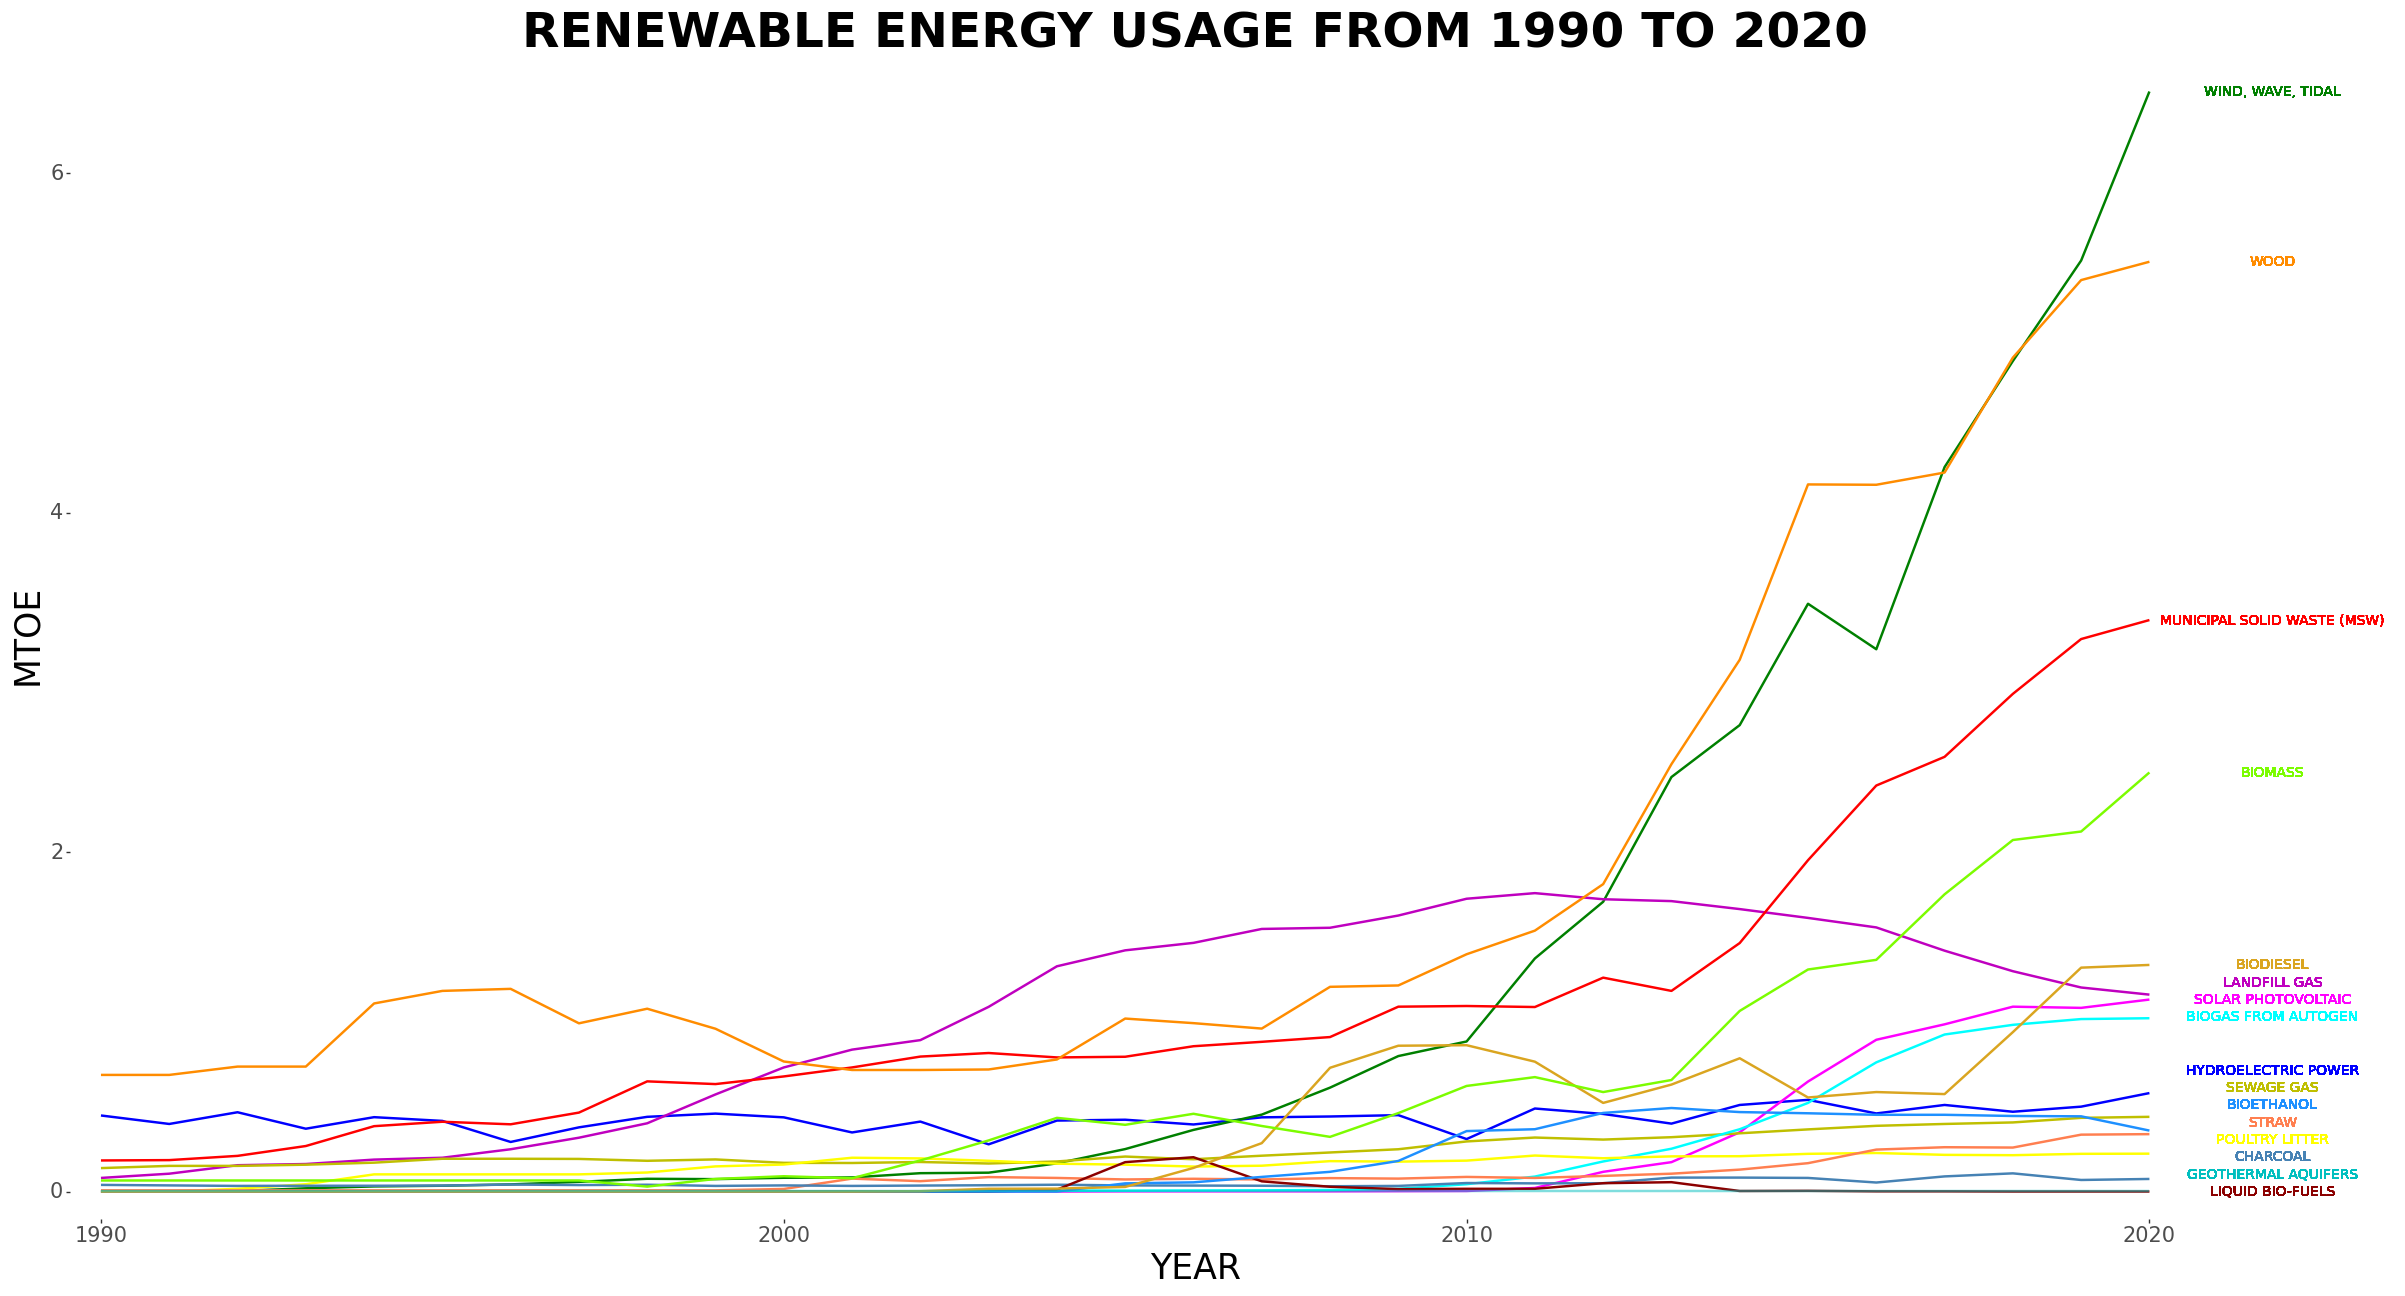

<ggplot: (152234794162)>

In [44]:
pn.options.figure_size = (30, 15)

overview_plot = (ggplot(df, aes(x='YEAR')) +
 geom_line(aes(y='HYDROELECTRIC POWER'), color='b', size=1) +
 geom_line(aes(y='WIND, WAVE, TIDAL'), color='g', size=1) +
 geom_line(aes(y='SOLAR PHOTOVOLTAIC'), color='magenta', size=1) +
 geom_line(aes(y='LANDFILL GAS'), color='m', size=1) +
 geom_line(aes(y='SEWAGE GAS'), color='y', size=1) +
 geom_line(aes(y='BIOGAS FROM AUTOGEN'), color='aqua', size=1) +
 geom_line(aes(y='MUNICIPAL SOLID WASTE (MSW)'), color='r', size=1) +
 geom_line(aes(y='POULTRY LITTER'), color='yellow', size=1) +
 geom_line(aes(y='STRAW'), color='coral', size=1) +
 geom_line(aes(y='WOOD'), color='darkorange', size=1) +
 geom_line(aes(y='CHARCOAL'), color='steelblue', size=1) +
 geom_line(aes(y='LIQUID BIO-FUELS'), color='darkred', size=1) +
 geom_line(aes(y='BIOETHANOL'), color='dodgerblue', size=1) +
 geom_line(aes(y='BIODIESEL'), color='goldenrod', size=1) +
 geom_line(aes(y='BIOMASS'), color='lawngreen', size=1) +
 geom_line(aes(y='GEOTHERMAL AQUIFERS'), color='c', size=1, alpha=0.5) +
 labs(y='MTOE', title='RENEWABLE ENERGY USAGE FROM 1990 TO 2020') +  
 geom_text(x=2021.8, y=0.714, label='HYDROELECTRIC POWER', color='b', size=10) +
 geom_text(x=2021.8, y=6.481, label='WIND, WAVE, TIDAL', color='g', size=10) +
 geom_text(x=2021.8, y=1.131, label='SOLAR PHOTOVOLTAIC', color='magenta', size=10) +
 geom_text(x=2021.8, y=0.102, label='GEOTHERMAL AQUIFERS', color='c', size=10) +
 geom_text(x=2021.8, y=1.233, label='LANDFILL GAS', color='m', size=10) +
 geom_text(x=2021.8, y=0.612, label='SEWAGE GAS', color='y', size=10) +
 geom_text(x=2021.8, y=1.029, label='BIOGAS FROM AUTOGEN', color='aqua', size=10) +
 geom_text(x=2021.8, y=3.367, label='MUNICIPAL SOLID WASTE (MSW)', color='r', size=10) +
 geom_text(x=2021.8, y=0.306, label='POULTRY LITTER', color='yellow', size=10) +
 geom_text(x=2021.8, y=0.408, label='STRAW', color='coral', size=10) +
 geom_text(x=2021.8, y=5.478, label='WOOD', color='darkorange', size=10) +
 geom_text(x=2021.8, y=0.204, label='CHARCOAL', color='steelblue', size=10) +
 geom_text(x=2021.8, y=0, label='LIQUID BIO-FUELS', color='darkred', size=10) +
 geom_text(x=2021.8, y=0.51, label='BIOETHANOL', color='dodgerblue', size=10) +
 geom_text(x=2021.8, y=1.335, label='BIODIESEL', color='goldenrod', size=10) +
 geom_text(x=2021.8, y=2.469, label='BIOMASS', color='lawngreen', size=10) +
 xlim(1990, 2022) +
 theme_bw() +
 theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
 scale_x_continuous(expand=(0.015, 0, 0, 3.6)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
 theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

overview_plot

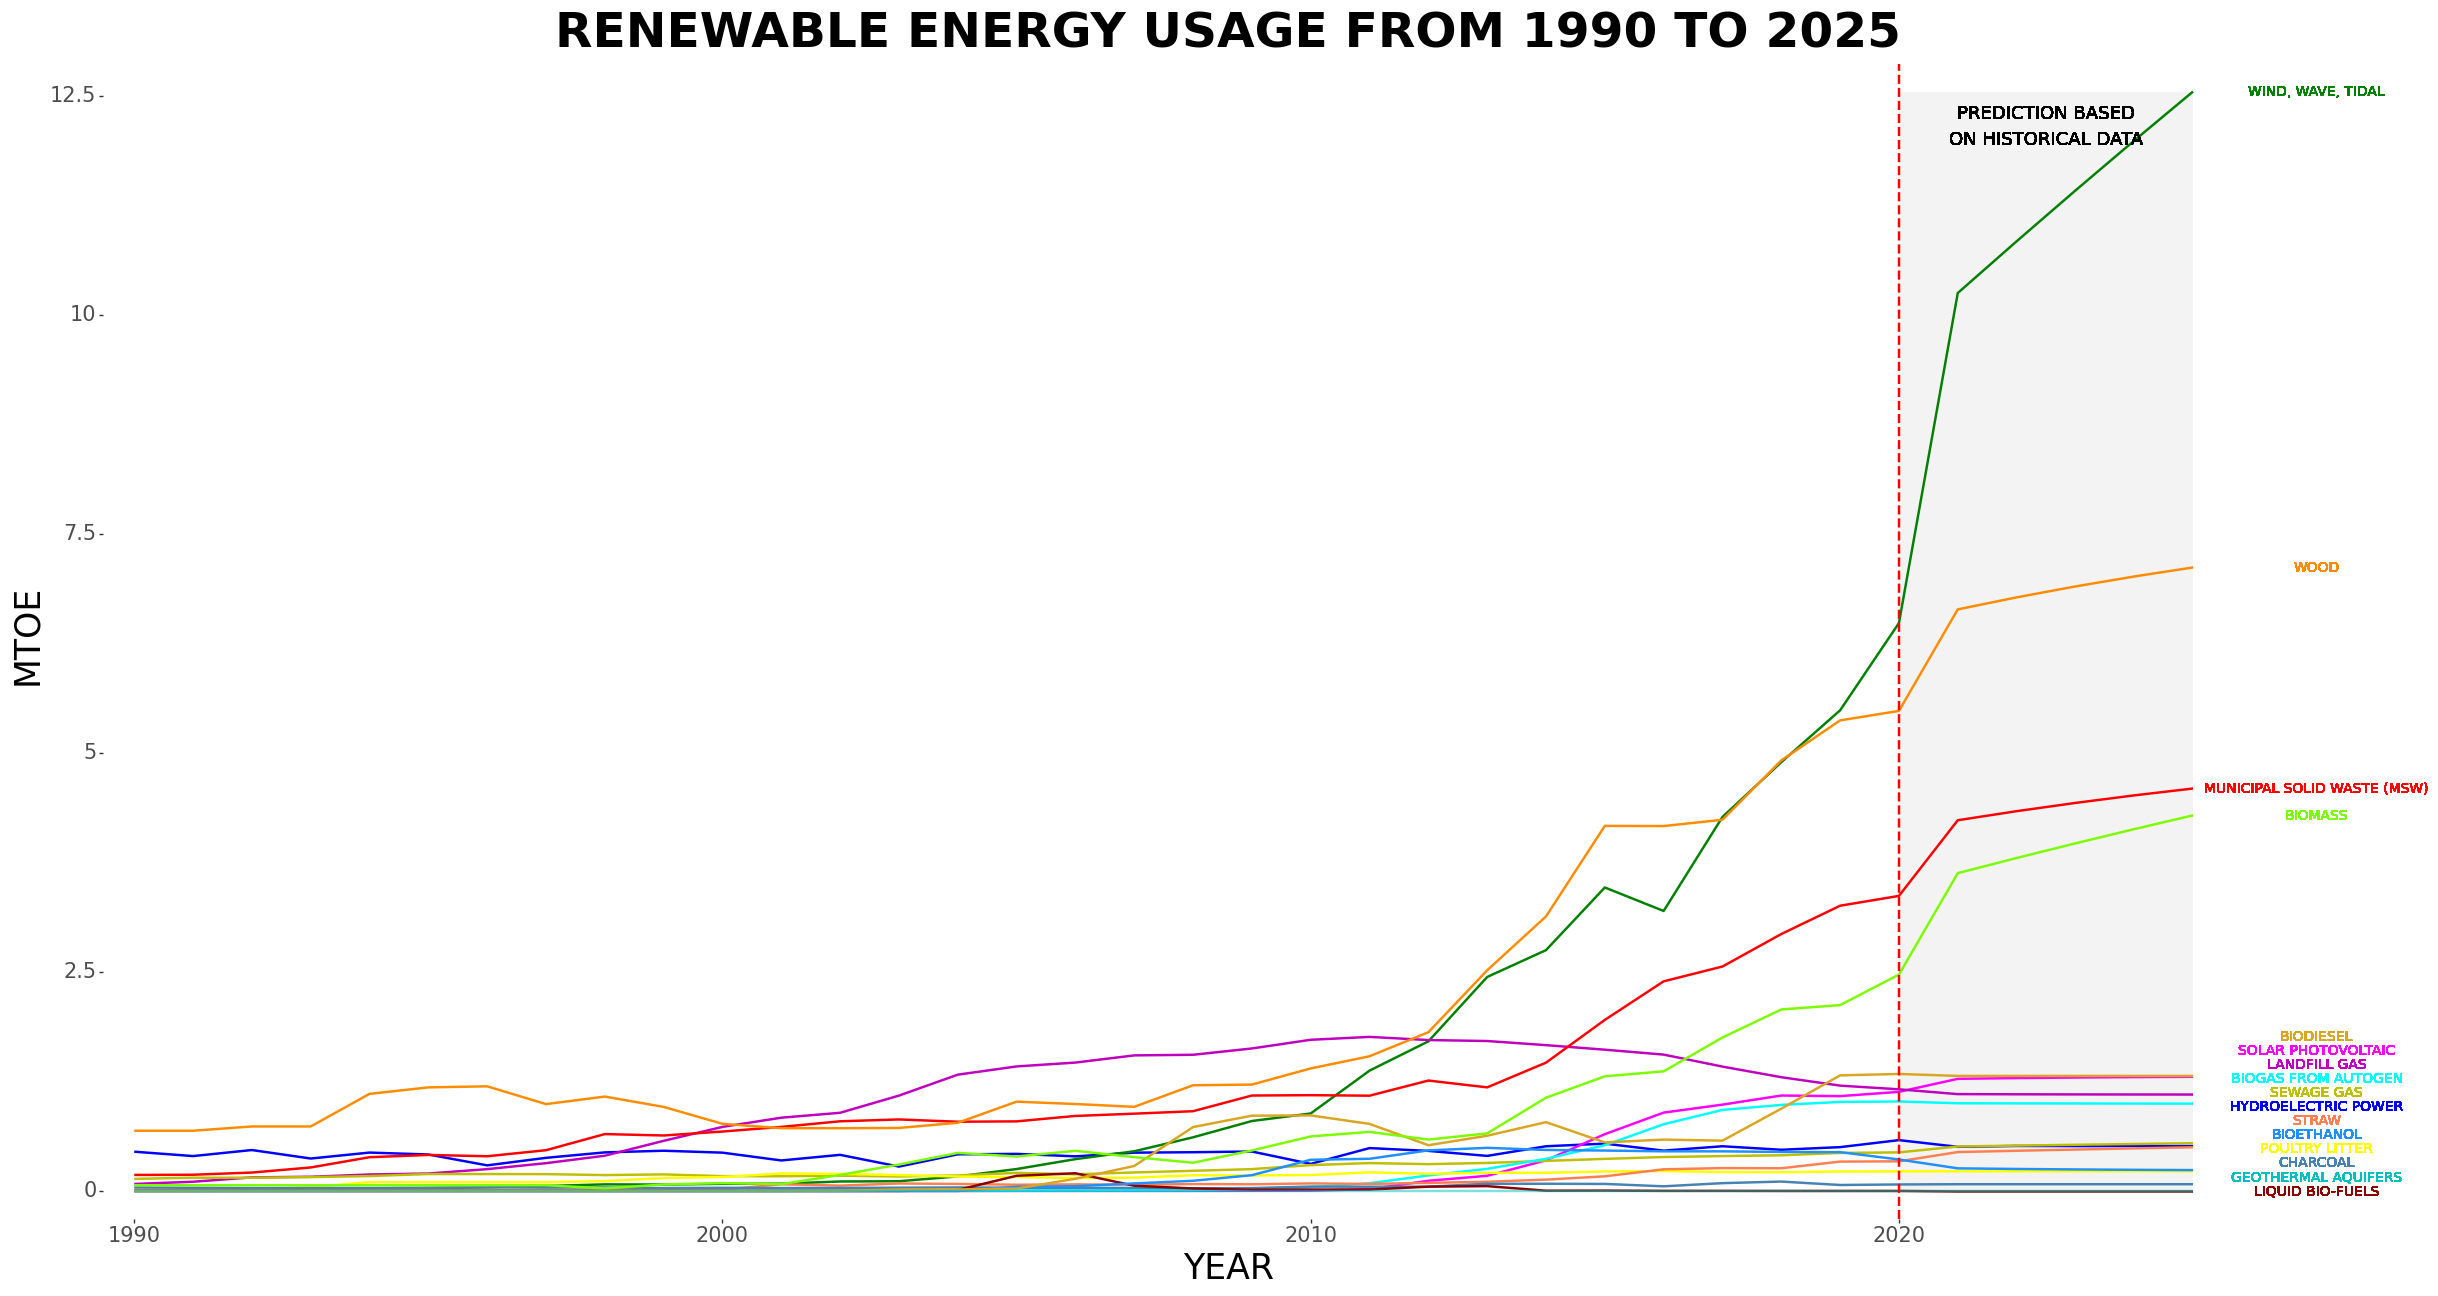

<ggplot: (152234846175)>

In [45]:
pn.options.figure_size = (30, 15)

overview_pred_plot = (ggplot(df_predictions, aes(x='YEAR')) +
 geom_rect(aes(xmin = 2020, xmax = 2025, ymin = 0, ymax = 12.546467), fill = "#F3F3F3") +
 geom_line(aes(y='HYDROELECTRIC POWER'), color='b', size=1) +
 geom_line(aes(y='WIND, WAVE, TIDAL'), color='g', size=1) +
 geom_line(aes(y='SOLAR PHOTOVOLTAIC'), color='magenta', size=1) +
 geom_line(aes(y='LANDFILL GAS'), color='m', size=1) +
 geom_line(aes(y='SEWAGE GAS'), color='y', size=1) +
 geom_line(aes(y='BIOGAS FROM AUTOGEN'), color='aqua', size=1) +
 geom_line(aes(y='MUNICIPAL SOLID WASTE (MSW)'), color='r', size=1) +
 geom_line(aes(y='POULTRY LITTER'), color='yellow', size=1) +
 geom_line(aes(y='STRAW'), color='coral', size=1) +
 geom_line(aes(y='WOOD'), color='darkorange', size=1) +
 geom_line(aes(y='CHARCOAL'), color='steelblue', size=1) +
 geom_line(aes(y='LIQUID BIO-FUELS'), color='darkred', size=1) +
 geom_line(aes(y='BIOETHANOL'), color='dodgerblue', size=1) +
 geom_line(aes(y='BIODIESEL'), color='goldenrod', size=1) +
 geom_line(aes(y='BIOMASS'), color='lawngreen', size=1) +
 geom_line(aes(y='GEOTHERMAL AQUIFERS'), color='c', size=1, alpha=0.5) +
 labs(y='MTOE', title='RENEWABLE ENERGY USAGE FROM 1990 TO 2025') +  
 geom_text(x=2022.5, y=12.3, label='PREDICTION BASED', color='black', size=13) +
 geom_text(x=2022.5, y=12, label='ON HISTORICAL DATA', color='black', size=13) +
 geom_text(x=2027.1, y=0.96, label='HYDROELECTRIC POWER', color='b', size=10) +
 geom_text(x=2027.1, y=12.546467, label='WIND, WAVE, TIDAL', color='g', size=10) +
 geom_text(x=2027.1, y=1.6, label='SOLAR PHOTOVOLTAIC', color='magenta', size=10) +
 geom_text(x=2027.1, y=0.16, label='GEOTHERMAL AQUIFERS', color='c', size=10) +
 geom_text(x=2027.1, y=1.44, label='LANDFILL GAS', color='m', size=10) +
 geom_text(x=2027.1, y=1.12, label='SEWAGE GAS', color='y', size=10) +
 geom_text(x=2027.1, y=1.28, label='BIOGAS FROM AUTOGEN', color='aqua', size=10) +
 geom_text(x=2027.1, y=4.592751, label='MUNICIPAL SOLID WASTE (MSW)', color='r', size=10) +
 geom_text(x=2027.1, y=0.48, label='POULTRY LITTER', color='yellow', size=10) +
 geom_text(x=2027.1, y=0.8, label='STRAW', color='coral', size=10) +
 geom_text(x=2027.1, y=7.115513, label='WOOD', color='darkorange', size=10) +
 geom_text(x=2027.1, y=0.32, label='CHARCOAL', color='steelblue', size=10) +
 geom_text(x=2027.1, y=0, label='LIQUID BIO-FUELS', color='darkred', size=10) +
 geom_text(x=2027.1, y=0.64, label='BIOETHANOL', color='dodgerblue', size=10) +
 geom_text(x=2027.1, y=1.76, label='BIODIESEL', color='goldenrod', size=10) +
 geom_text(x=2027.1, y=4.286267, label='BIOMASS', color='lawngreen', size=10) +
 geom_vline(xintercept = 2020, color = "red", size = 1, linetype = "dashed") +
 xlim(1990, 2027) +
 theme_bw() +
 theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
 scale_x_continuous(expand=(0.015, 0, 0, 4)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
 theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

overview_pred_plot

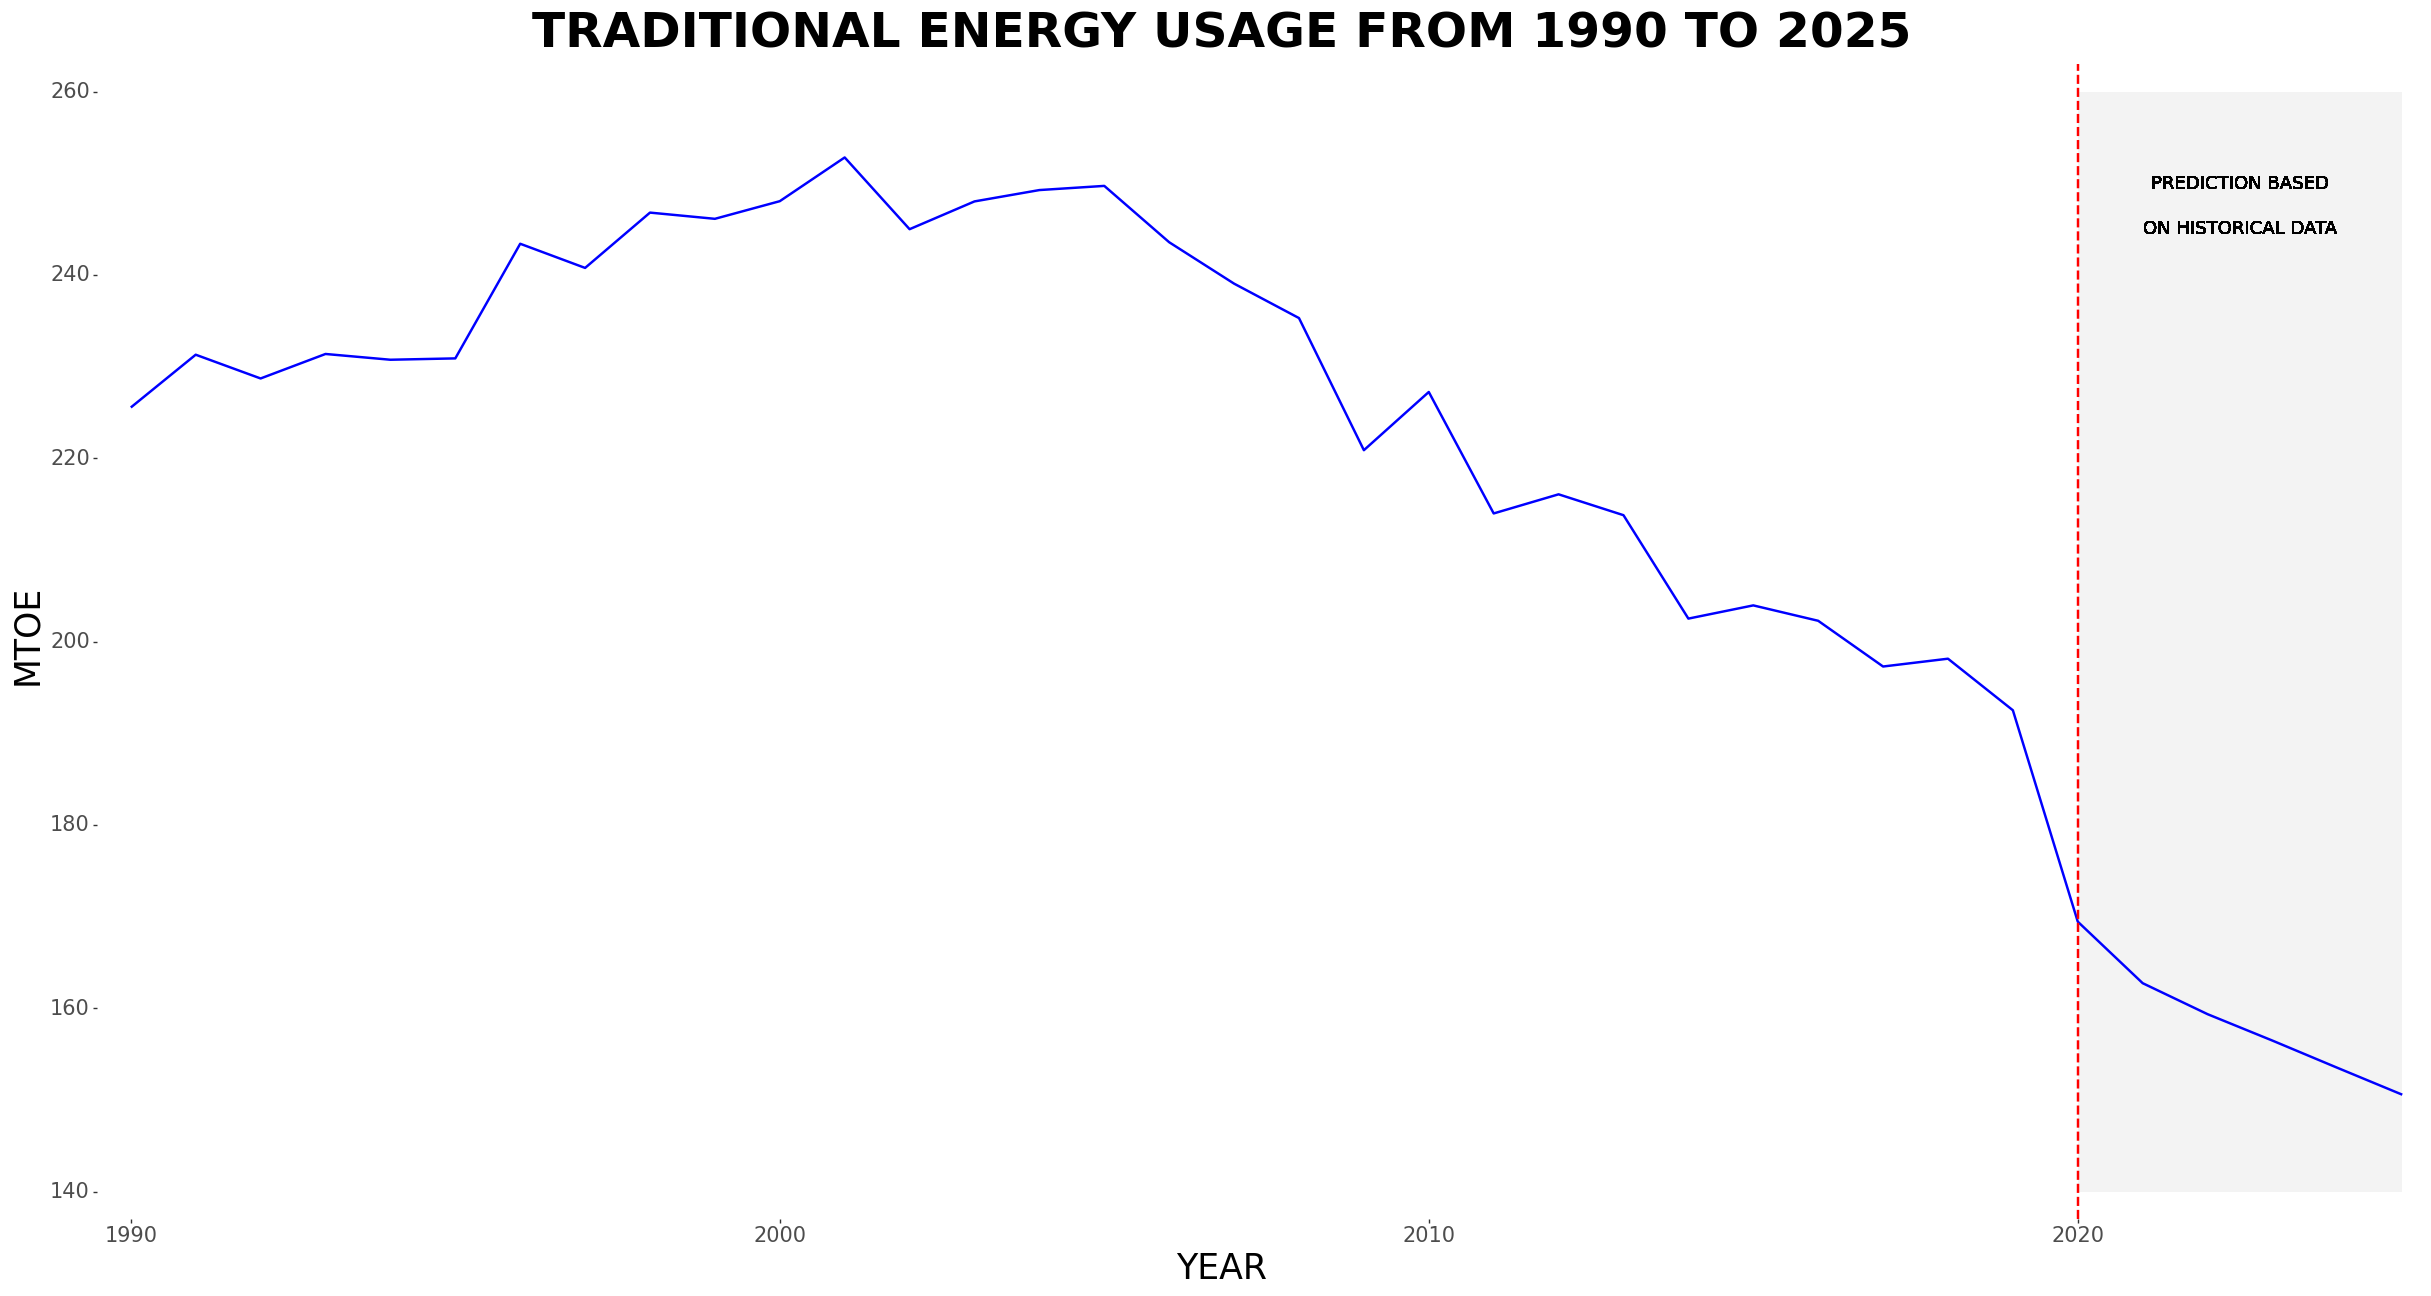

<ggplot: (152234775432)>

In [46]:
pn.options.figure_size = (30, 15)

trad_usage_plot = (ggplot(df_predictions, aes(x='YEAR')) +
 geom_rect(aes(xmin = 2020, xmax = 2025, ymin = 140, ymax = 260	), fill = "#F3F3F3") +
 geom_line(aes(y='TOTAL ENERGY CONSUMPTION OF PRIMARY FUELS AND EQUIVALENTS'), color='b', size=1) +
 labs(y='MTOE', title='TRADITIONAL ENERGY USAGE FROM 1990 TO 2025') +  
 geom_text(x=2022.5, y=250, label='PREDICTION BASED', color='black', size=13) +
 geom_text(x=2022.5, y=245, label='ON HISTORICAL DATA', color='black', size=13) +
geom_vline(xintercept = 2020, color = "red", size = 1, linetype = "dashed") +
 theme_bw() +
 theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
 scale_x_continuous(expand=(0.015, 0, 0, 0.3)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
 theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

trad_usage_plot

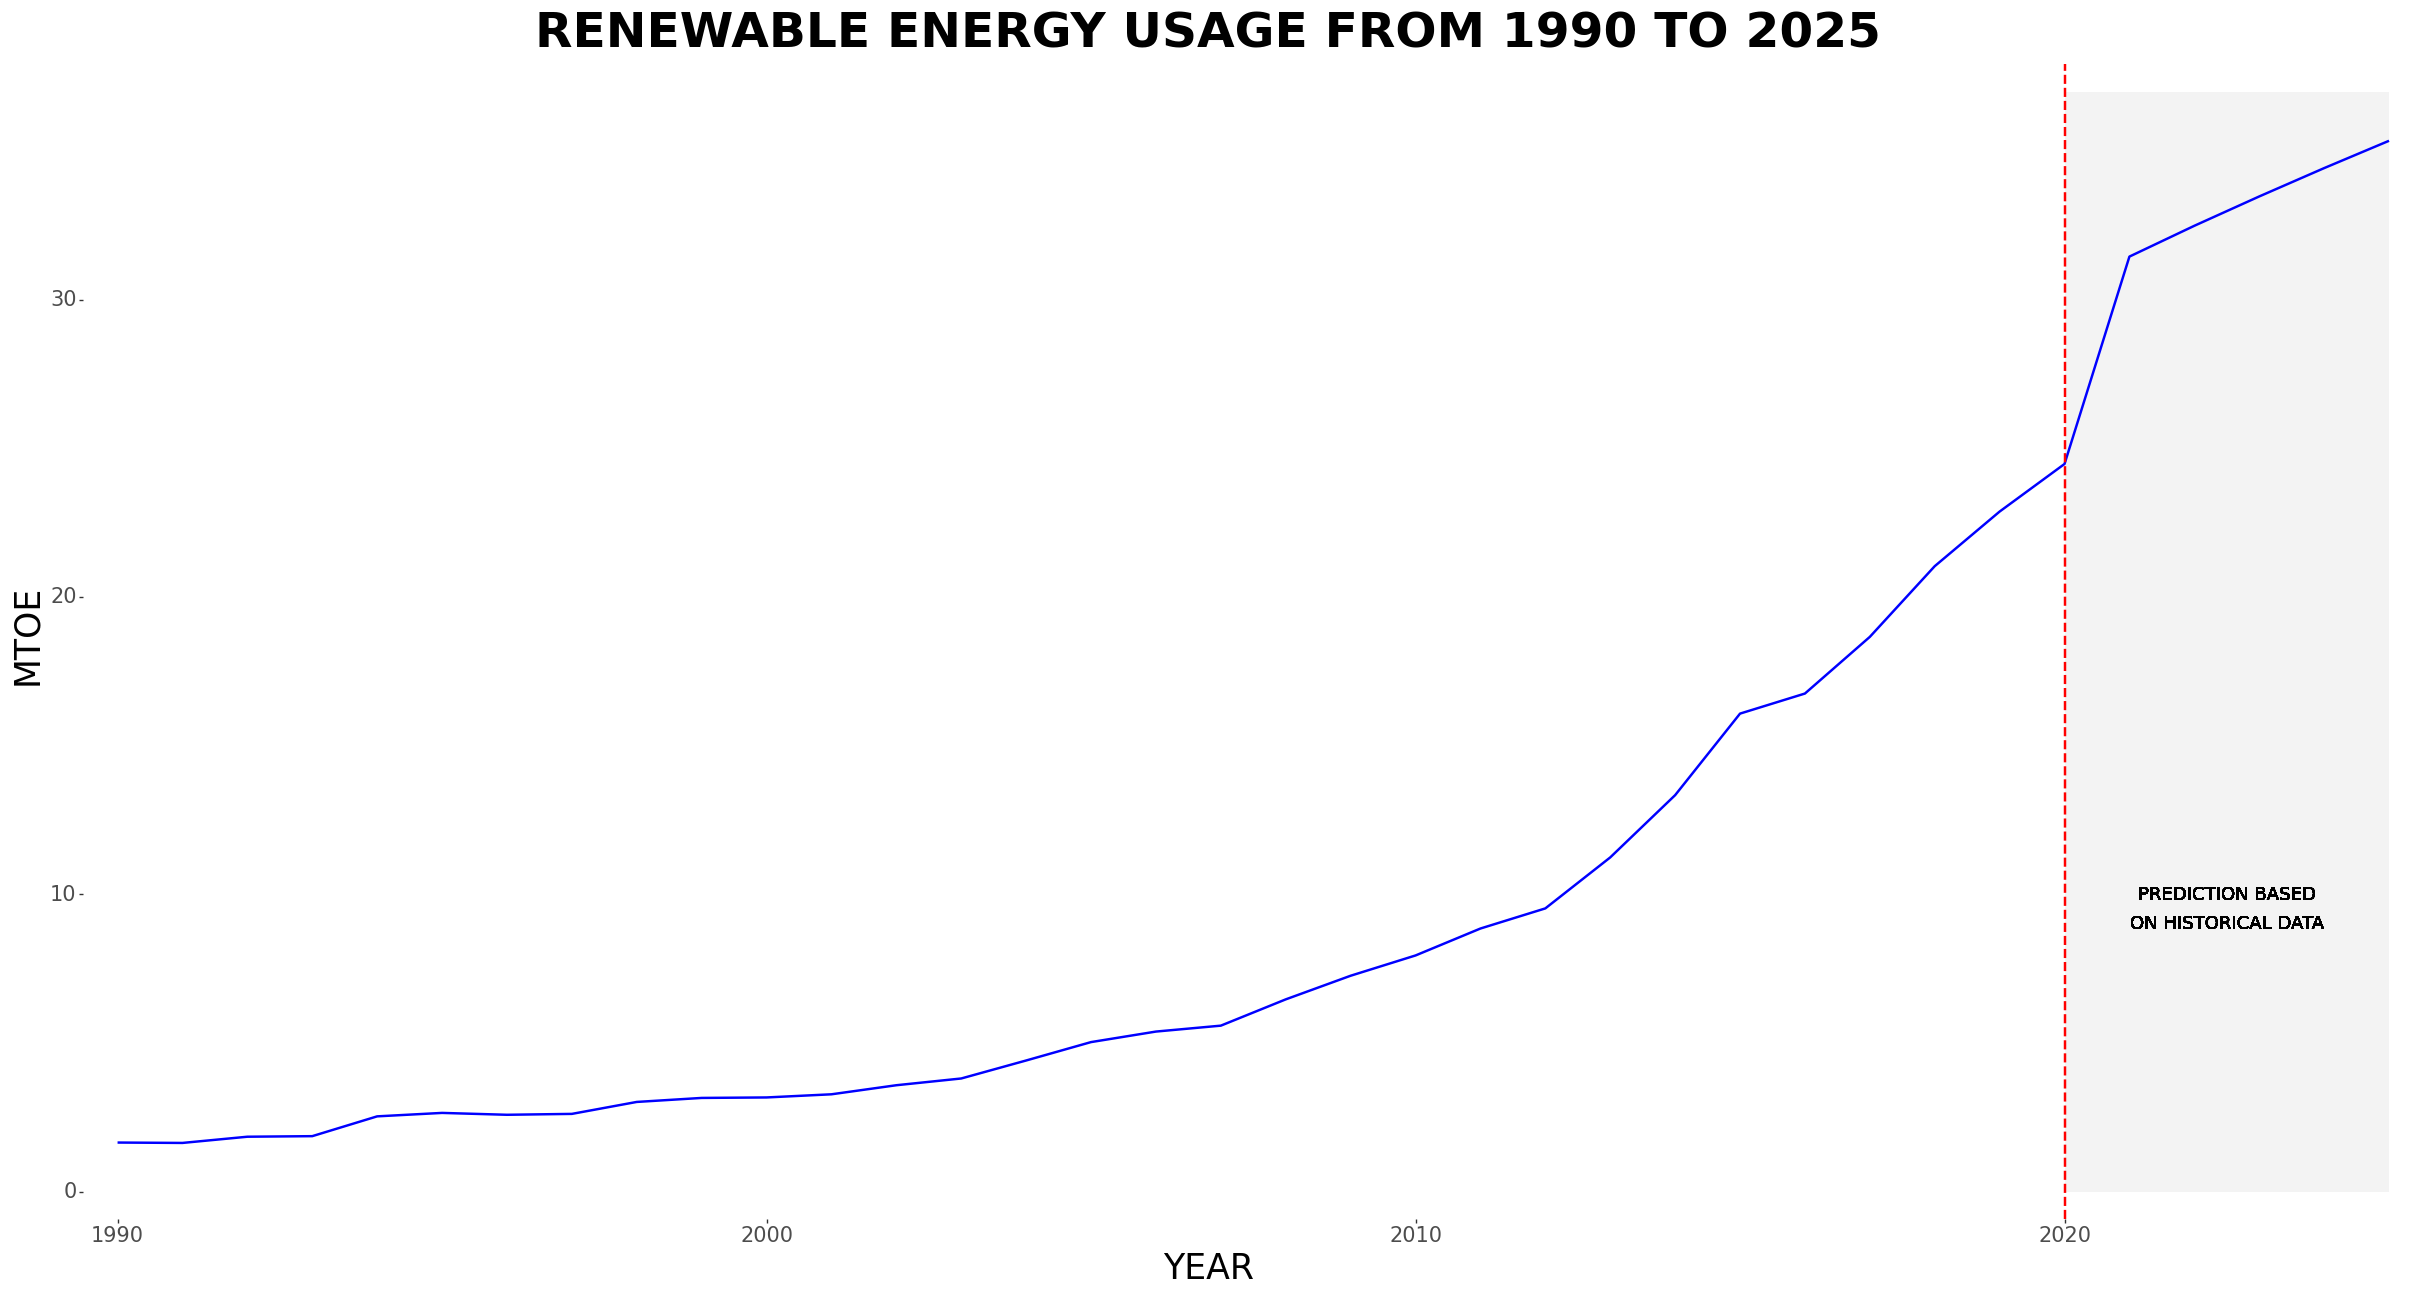

<ggplot: (152235256829)>

In [47]:
pn.options.figure_size = (30, 15)

ren_usage_plot = (ggplot(df_predictions, aes(x='YEAR')) +
 geom_rect(aes(xmin = 2020, xmax = 2025, ymin = 0, ymax = 37), fill = "#F3F3F3") +
 geom_line(aes(y='ENERGY FROM RENEWABLE & WASTE SOURCES'), color='b', size=1) +
 labs(y='MTOE', title='RENEWABLE ENERGY USAGE FROM 1990 TO 2025') +  
 geom_text(x=2022.5, y=10, label='PREDICTION BASED', color='black', size=13) +
 geom_text(x=2022.5, y=9, label='ON HISTORICAL DATA', color='black', size=13) +
 geom_vline(xintercept = 2020, color = "red", size = 1, linetype = "dashed") +
 theme_bw() +
 theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
 scale_x_continuous(expand=(0.015, 0, 0, 0.3)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
 theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

ren_usage_plot

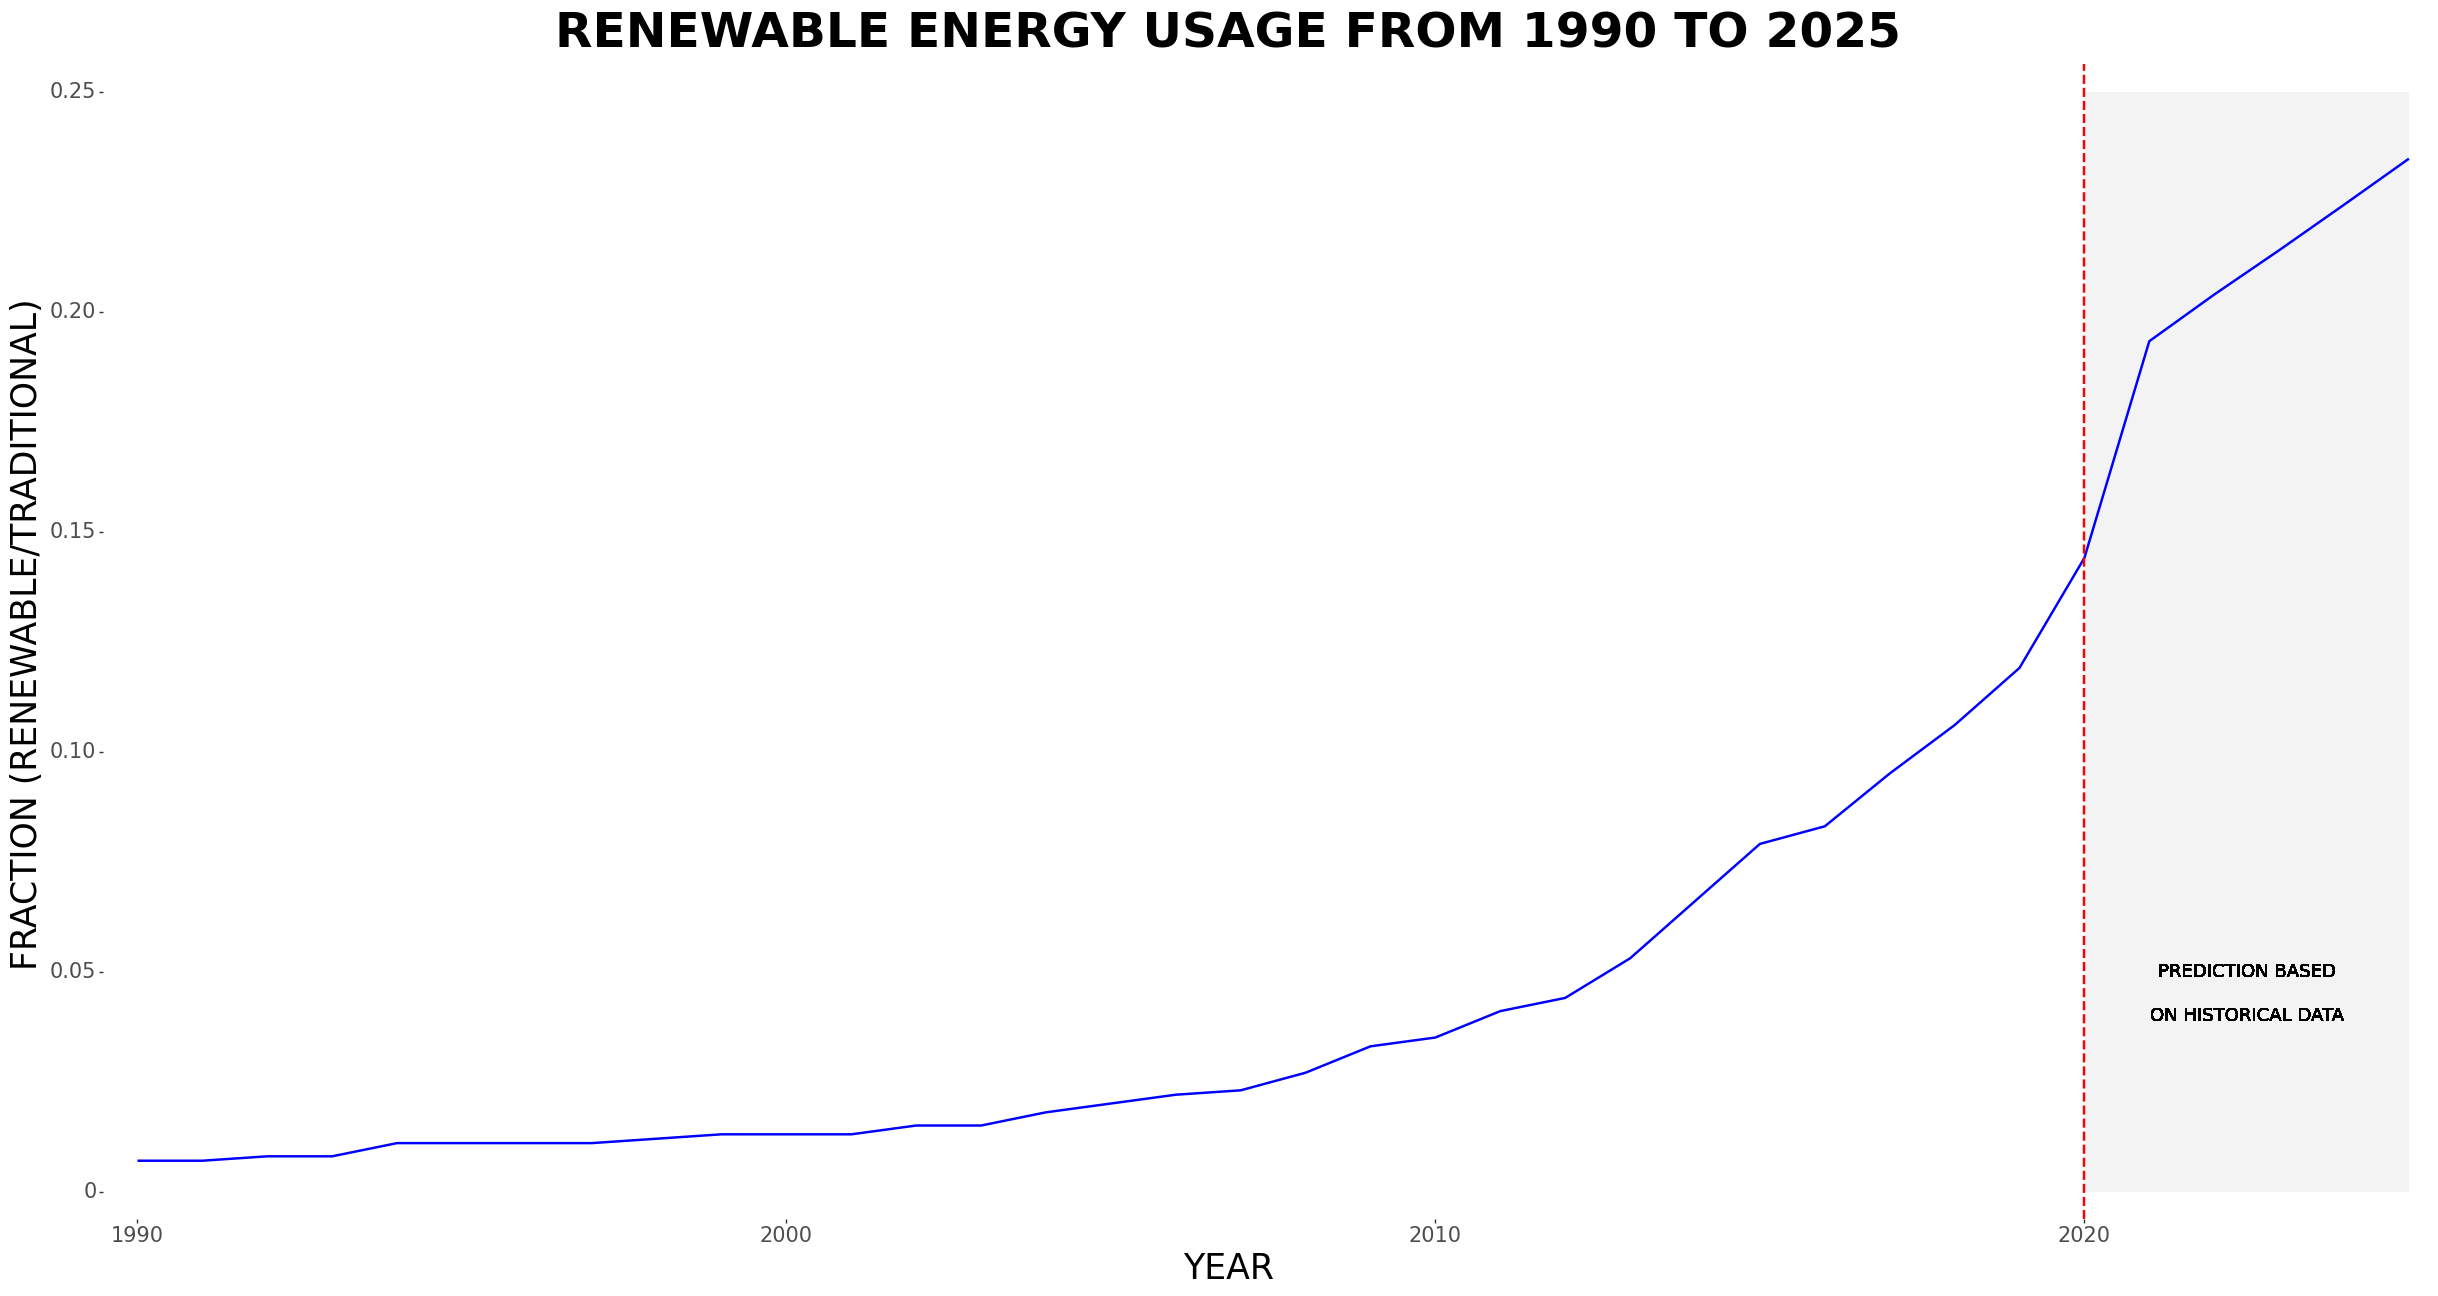

<ggplot: (152234816657)>

In [48]:
pn.options.figure_size = (30, 15)

ren_usage_frac_plot = (ggplot(df_predictions, aes(x='YEAR')) +
 geom_rect(aes(xmin = 2020, xmax = 2025, ymin = 0, ymax = 0.25), fill = "#F3F3F3") +
 geom_line(aes(y='FRACTION FROM RENEWABLE SOURCES AND WASTE'), color='b', size=1) +
 labs(y='FRACTION (RENEWABLE/TRADITIONAL)', title='RENEWABLE ENERGY USAGE FROM 1990 TO 2025') +  
 geom_text(x=2022.5, y=.05, label='PREDICTION BASED', color='black', size=13) +
 geom_text(x=2022.5, y=.04, label='ON HISTORICAL DATA', color='black', size=13) +
 geom_vline(xintercept = 2020, color = "red", size = 1, linetype = "dashed") +
 theme_bw() +
 theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
 scale_x_continuous(expand=(0.015, 0, 0, 0.3)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
 theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

ren_usage_frac_plot

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

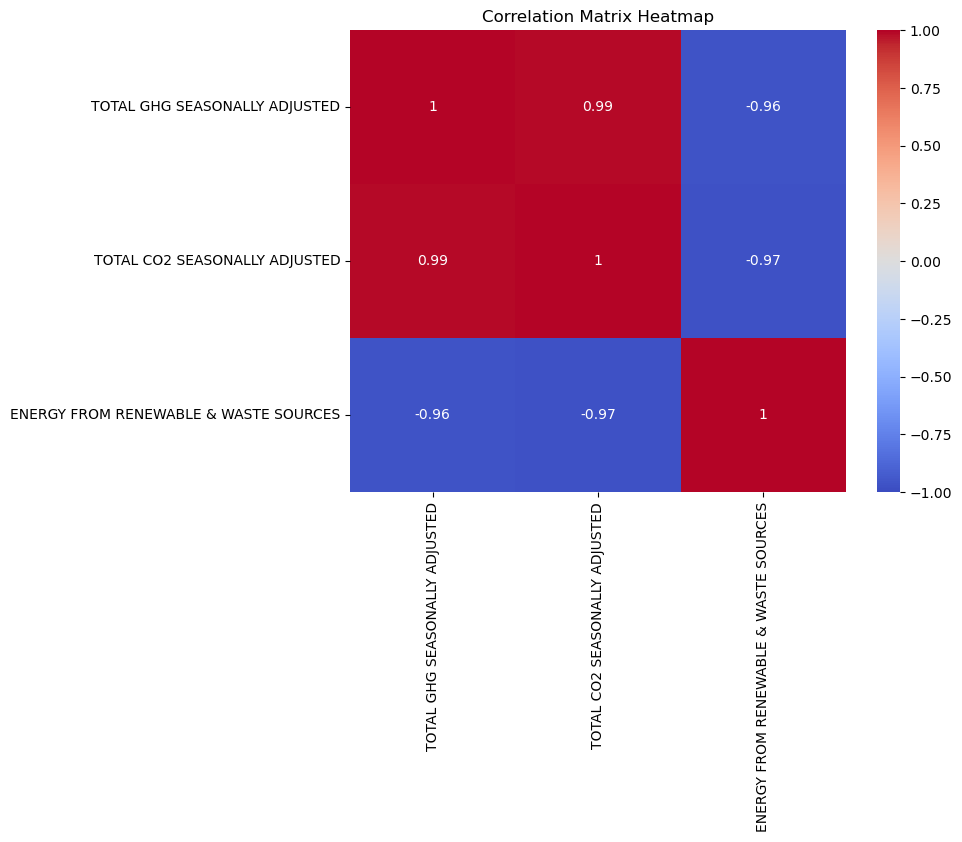

In [49]:
heatmap = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

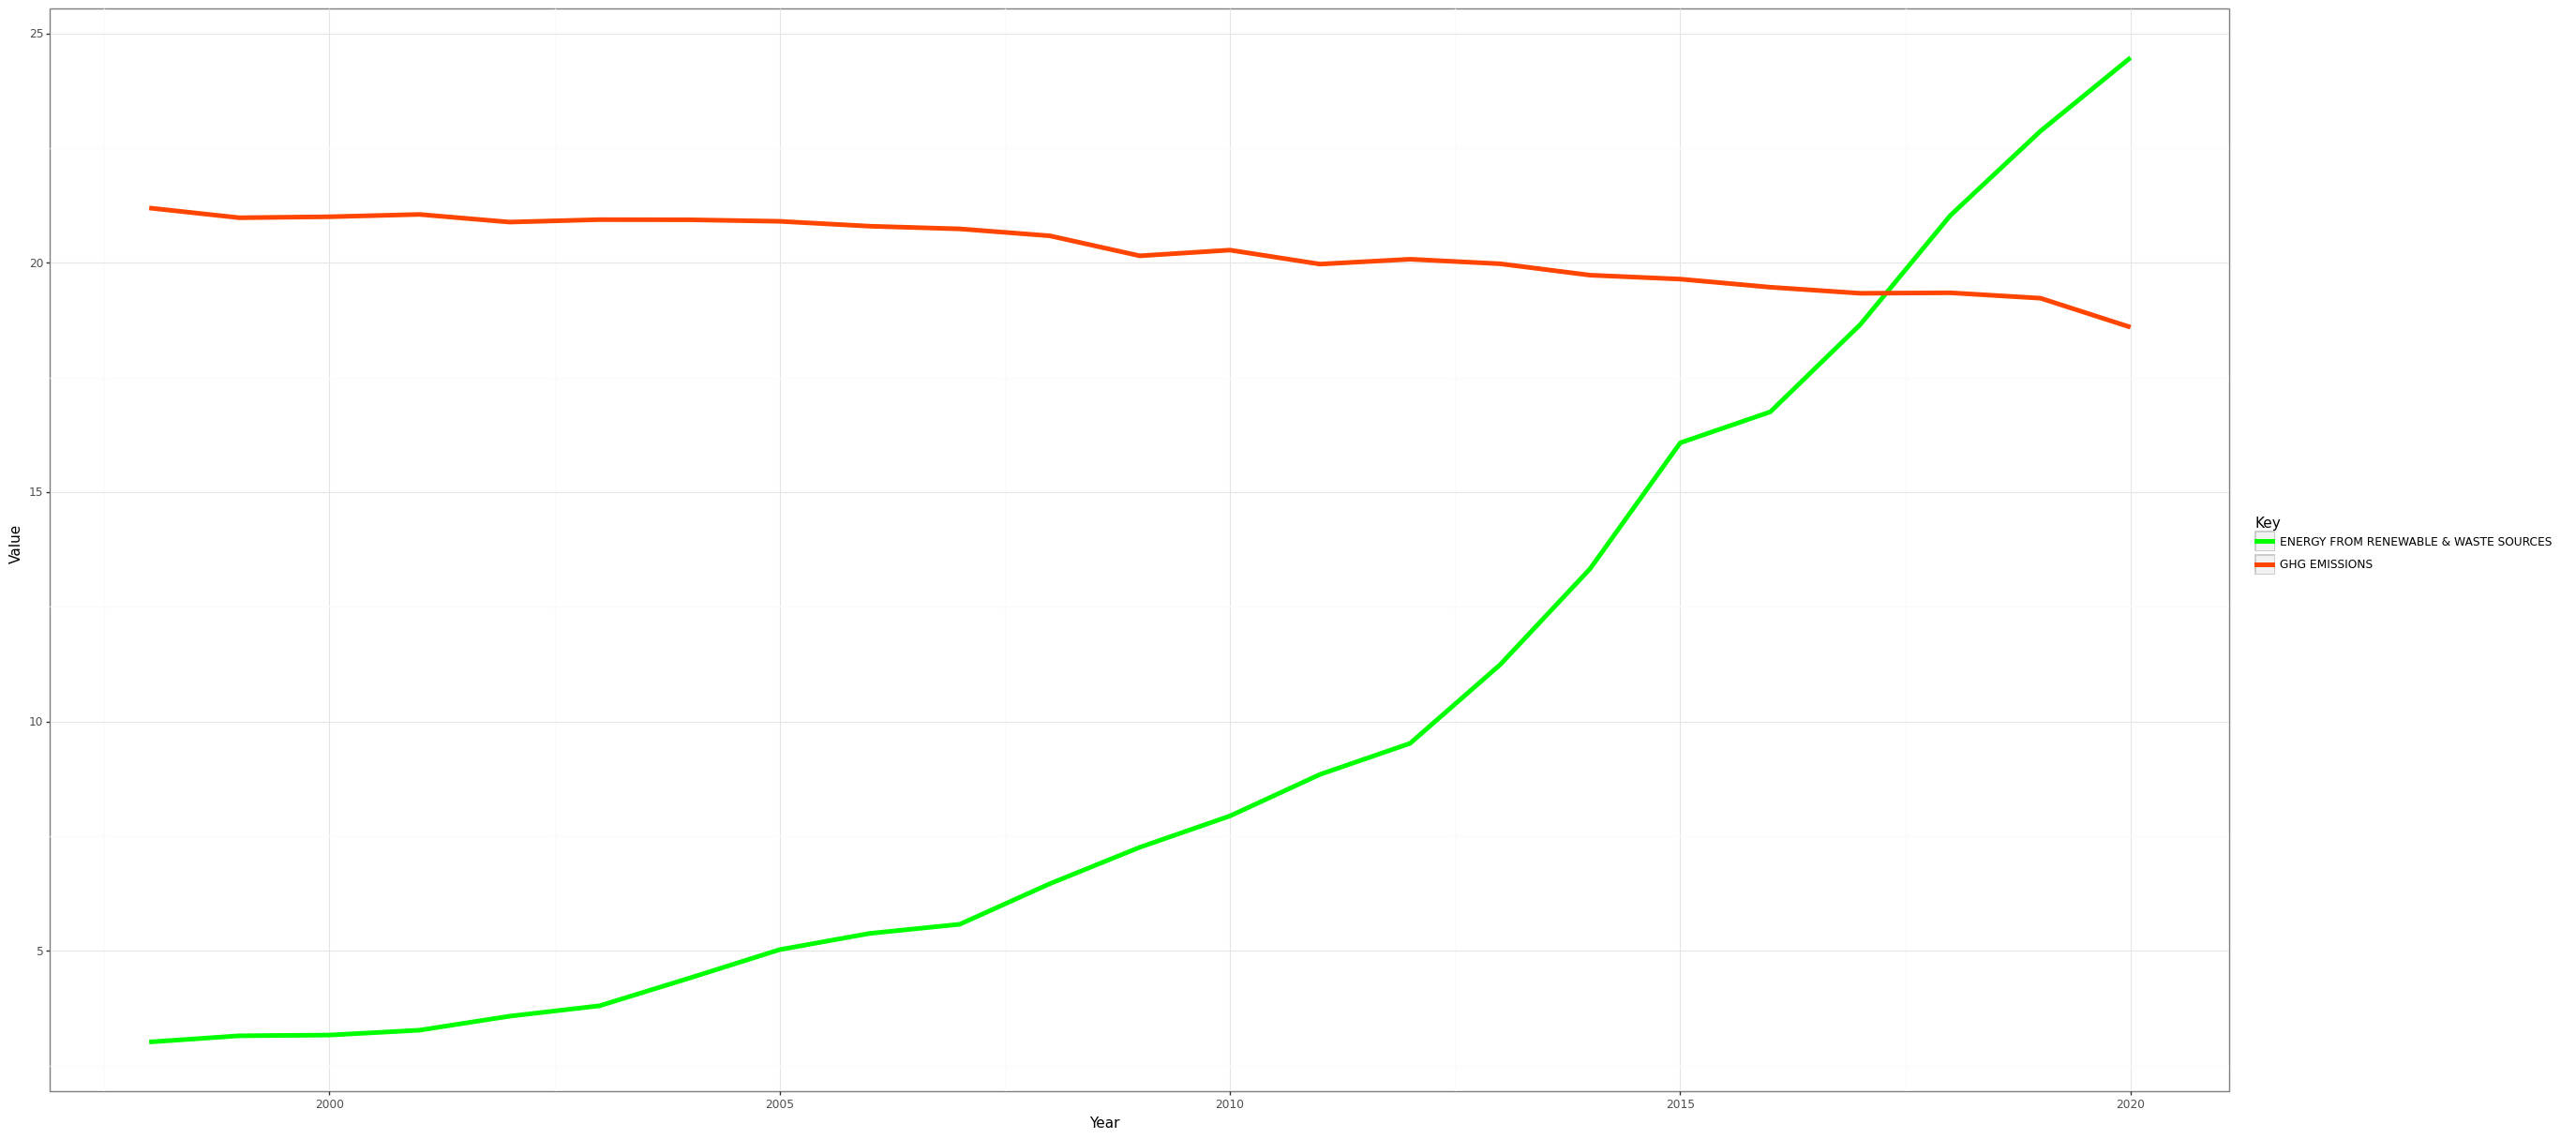

<ggplot: (152235249538)>

In [50]:
ren_vs_gg = (
    pn.ggplot(data=melted_df, mapping=pn.aes(x='YEAR', y='Value', color='Key')) +
    pn.geom_line(size=2) +
    pn.scale_color_manual(values=emissions_plot) +
    pn.labs(x='Year', y='Value', color='Key') +
    pn.theme_bw() +
    pn.theme(legend_position='right')
)

ren_vs_gg

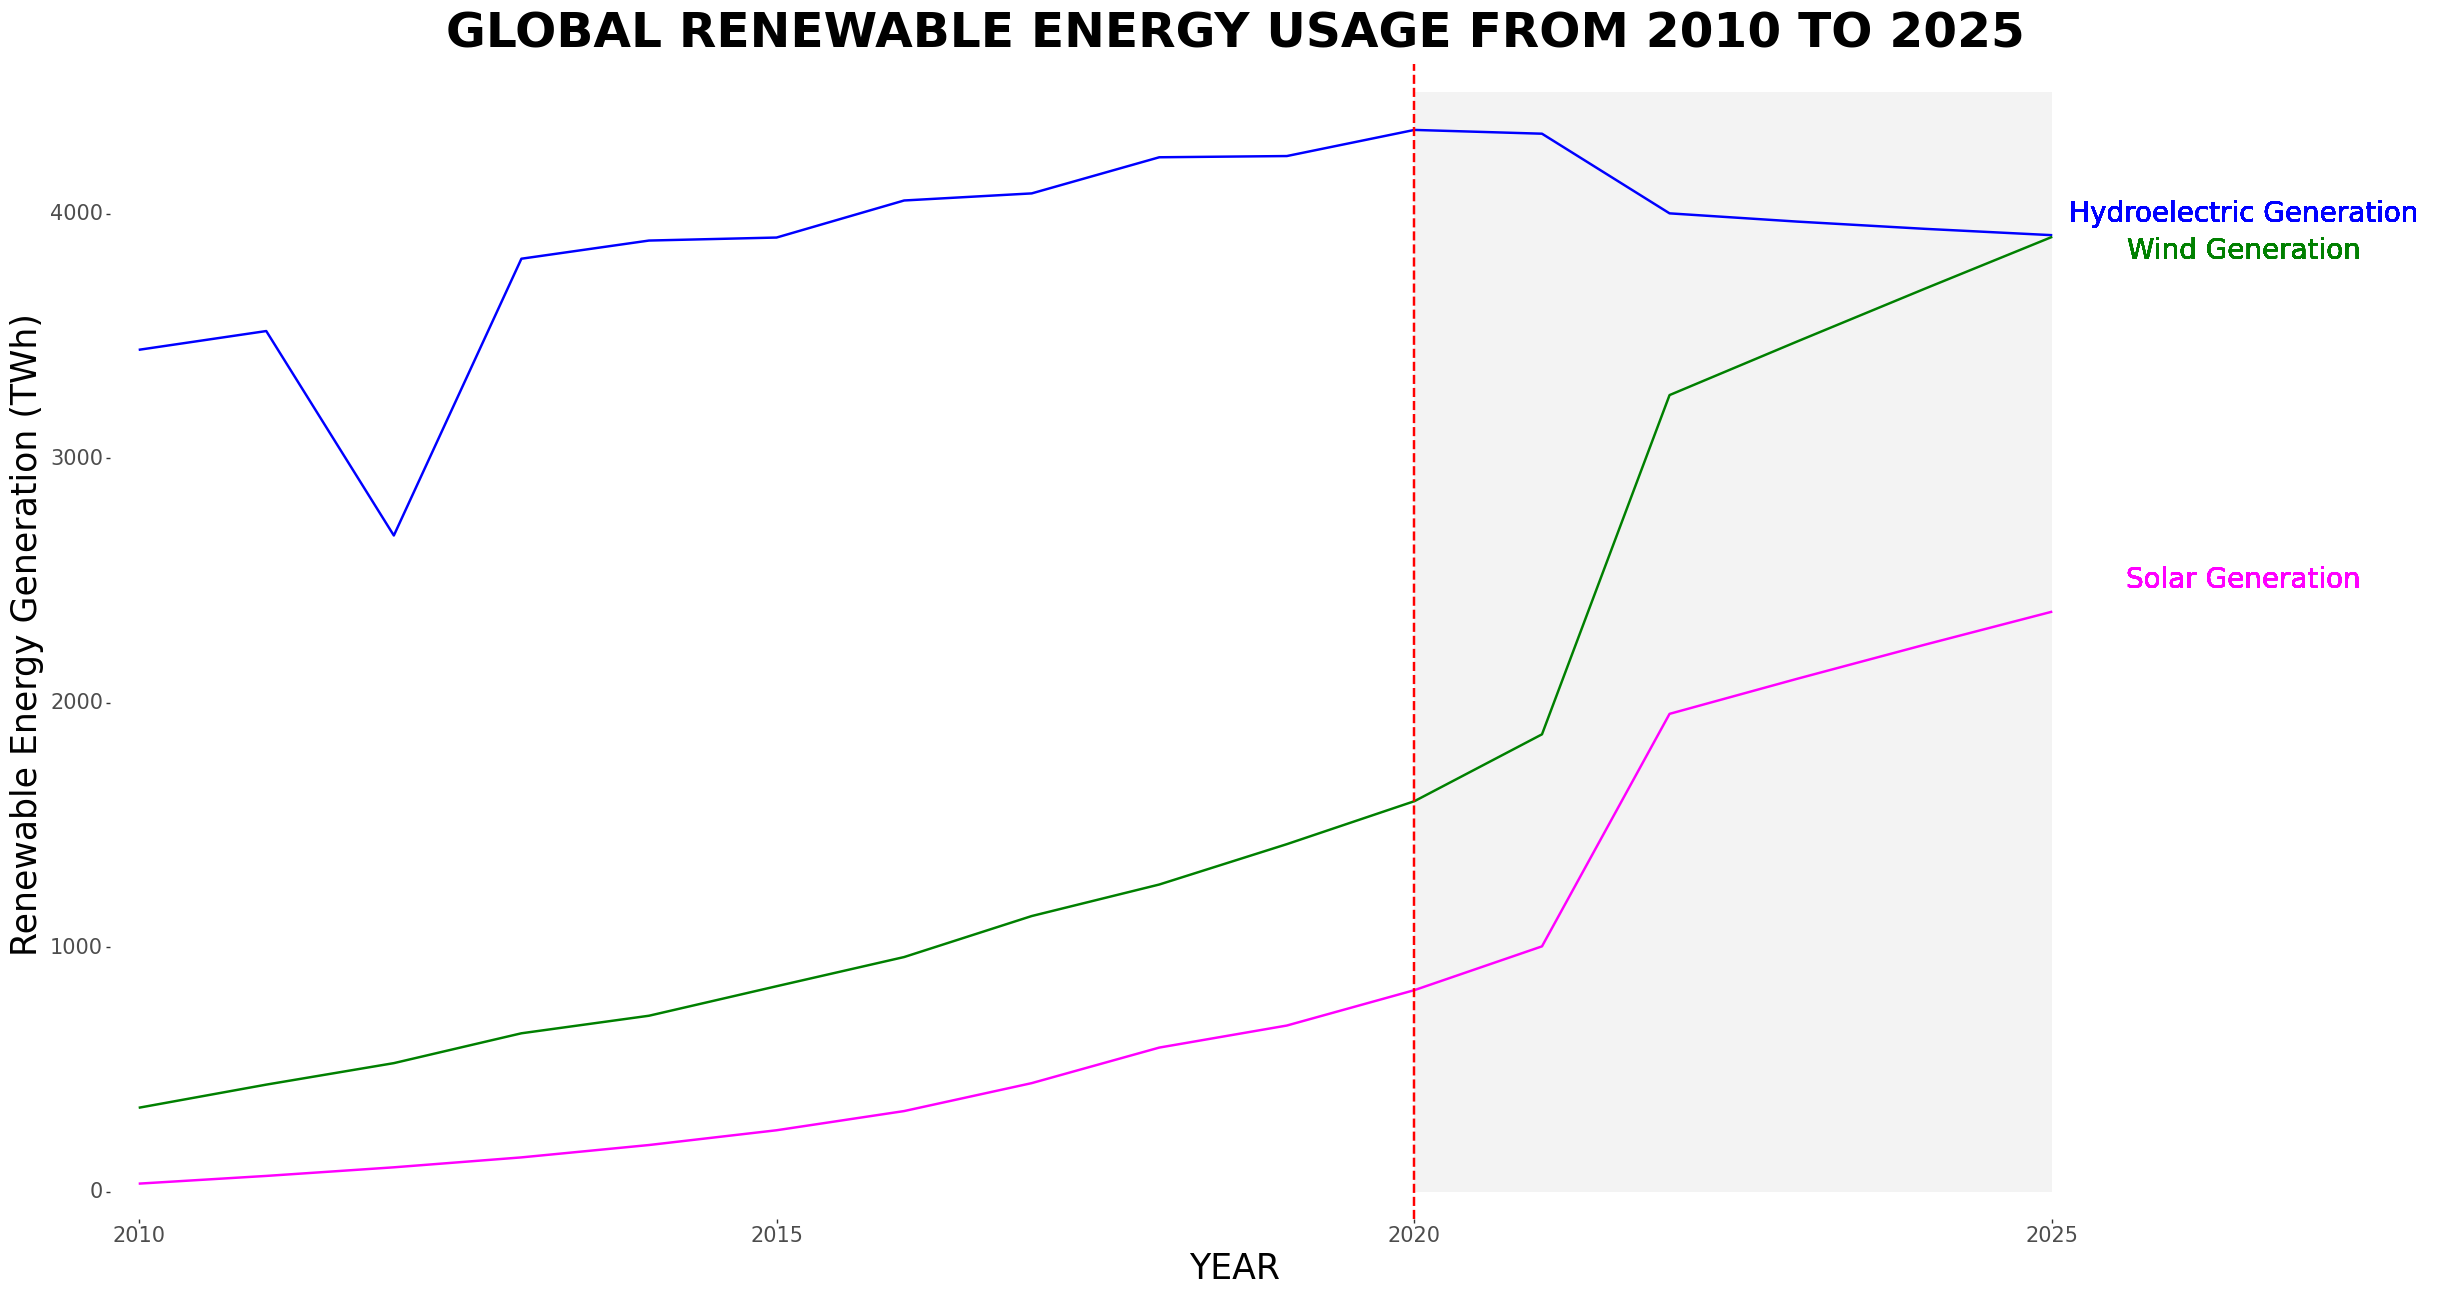

<ggplot: (152236602612)>

In [51]:
pn.options.figure_size = (30, 15)

overview_pred_plot_global = (ggplot(df_predictions1, aes(x='YEAR')) +
                      geom_rect(aes(xmin = 2020, xmax = 2025, ymin = 0, ymax = 4500), fill = "#F3F3F3") +
                      geom_line(aes(y='Hydroelectric Generation (TWh)'), color='b', size=1) +
                      geom_line(aes(y='Wind Generation (TWh)'), color='g', size=1) +
                      geom_line(aes(y='Solar Generation (TWh)'), color='magenta', size=1) +
                      labs(y='Renewable Energy Generation (TWh)', title='GLOBAL RENEWABLE ENERGY USAGE FROM 2010 TO 2025') +
                      geom_text(x=2026.5, y=4000, label='Hydroelectric Generation', color='b', size=20) +
                      geom_text(x=2026.5, y=3850, label='Wind Generation', color='g', size=20) +
                      geom_text(x=2026.5, y=2504.075416, label='Solar Generation', color='magenta', size=20) +  
                      geom_vline(xintercept = 2020, color = "red", size = 1, linetype = "dashed") +
                      xlim(1990, 2027) +
                      theme_bw() +
                      theme(panel_border=element_blank(),panel_grid_minor=element_blank(),panel_grid_major=element_blank()) +
                      scale_x_continuous(expand=(0.015, 0, 0, 3)) + scale_y_continuous(expand=(0.025, 0, 0.025, 0)) +
                      theme(plot_title = element_text(size = 35, face = "bold")) + theme(axis_title = element_text(size = 25)) + theme(axis_text = element_text(size = 15))
 )

overview_pred_plot_global

<AxesSubplot:>

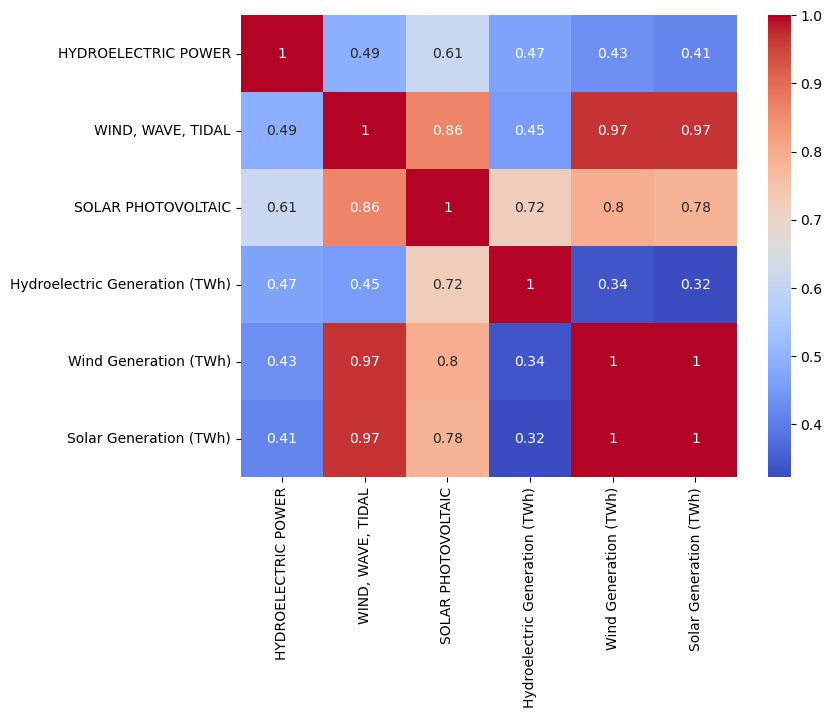

In [52]:
heatmap2 = plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

### Exporting Plots

In [53]:
overview_plot.save("overview_plot.png", dpi=300, limitsize=False)

overview_pred_plot.save("overview_pred_plot.png", dpi=300, limitsize=False)

trad_usage_plot.save("trad_usage_plot.png", dpi=300, limitsize=False)

ren_usage_plot.save("ren_usage_plot.png", dpi=300, limitsize=False)

ren_usage_frac_plot.save("ren_usage_frac_plot.png", dpi=300, limitsize=False)

heatmap.savefig('heatmap.png', dpi=300, bbox_inches='tight')

ren_vs_gg.save("ren_vs_gg.png", dpi=300, limitsize=False)

heatmap2.savefig('heatmap2.png', dpi=300, bbox_inches='tight')